In [1]:
%run benchmarking_functions.ipynb

In [2]:
results = []
if __name__ == "__main__":
    datasets = ['cifar10', 'fmnist', 'mnist']
    encodings = ['poisson_only', 'cnn+poisson']
    architectures = ['1SADP', '2SADP']
    timesteps = [25, 100]
    n_internal_epochs = 50  

    for dname in datasets:
        print("\n" + "#" * 80)
        print(f"Running full SNN pipeline for {dname.upper()}")
        print("#" * 80)

        for arch in architectures:
            print("\n" + "=" * 80)
            print(f"Architecture: {arch}")
            print("=" * 80)

            for T_val in timesteps:
                print("\n" + "~" * 80)
                print(f"Time Steps: {T_val}")
                print("~" * 80)

                for encoding in encodings:
                    print("\n" + "-" * 60)
                    print(f"Encoding type: {encoding}")
                    print("-" * 60)

                    # ---- Encoder / Feature extraction ----
                    run_experiment(
                        dataset_name=dname,
                        feature_dim=128,
                        encoder_epochs=50,
                        batch_size_encoder=128,
                        pretrain_encoder=True,
                        Nhid=256,
                        theta_h_base=0.5,
                        seed=42,
                        architecture=arch,
                        T=T_val,
                        encoding_type=encoding
                    )

                    # ---- Train SNN ----
                    print(f"\nTraining SNN on {dname.upper()} features ({encoding}, {arch}, T={T_val})...")
                    t_start = time.time()

                    acc, n_epochs_run, epoch_accs = train_snn(
                    n_epochs=n_internal_epochs,
                    batch_size=128
                    )
                    
                    final_train_acc = epoch_accs[-1] if len(epoch_accs) > 0 else None
        

                    t_end = time.time()
                    total_time = t_end - t_start
                    avg_time_per_epoch = total_time / n_epochs_run

                    # ---- Evaluate SNN ----
                    print(f"\nEvaluating SNN on {dname.upper()} ({encoding}, {arch}, T={T_val})...")
                    acc_eval = evaluate_snn(batch_size=256)

                    sh, so = forward_lif_features(test_feats_norm, teacher_force=False)
                    preds = np.argmax(so.sum(axis=1), axis=1)
                    y_true = y_test

                    prec = precision_score(y_true, preds, average='macro', zero_division=0)
                    rec = recall_score(y_true, preds, average='macro', zero_division=0)
                    f1 = f1_score(y_true, preds, average='macro', zero_division=0)

                    results.append({
                        "Dataset": dname.upper(),
                        "Architecture": arch,
                        "Timestep": T_val,
                        "Encoding": encoding,
                        "Final Train Accuracy": final_train_acc,   
                        "Eval Accuracy": acc_eval,
                        "Precision": prec,
                        "Recall": rec,
                        "F1-score": f1,
                        "Total Train Time (s)": total_time,
                        "Internal Epochs Run": n_epochs_run,
                        "Avg Time per Internal Epoch (s)": avg_time_per_epoch,
                        "Epoch Accuracies": epoch_accs
                    })



# -----------------------------------------------------
# Save Results
# -----------------------------------------------------
df_results = pd.DataFrame(results)

print("\n" + "#" * 80)
print("SNN Performance Summary")
print("#" * 80)
print(df_results)


################################################################################
Running full SNN pipeline for CIFAR10
################################################################################

Architecture: 1SADP

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on CIFAR10 | 1SADP | T=25 | Encoding: poisson_only
Loaded CIFAR10 dataset with shape: (32, 32, 3)
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Feature dim (Nin): 3072, Nhid: 256, Nout: 10
Initialized W1: (3072, 256), W2: (256, 10), theta_h: (256,)

Training SNN on CIFAR10 features (poisson_only, 1SADP, T=25)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:09<00:00,  1.56it/s]


Epoch 1/50 | Train acc = 0.1464 | avg κ = 0.000059 | Time = 249.50s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:09<00:00,  1.56it/s]


Epoch 2/50 | Train acc = 0.2104 | avg κ = -0.001488 | Time = 249.98s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 3/50 | Train acc = 0.2476 | avg κ = -0.001653 | Time = 238.52s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 4/50 | Train acc = 0.2599 | avg κ = -0.001539 | Time = 239.33s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 5/50 | Train acc = 0.2588 | avg κ = -0.001117 | Time = 238.15s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 6/50 | Train acc = 0.2567 | avg κ = -0.000890 | Time = 237.34s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 7/50 | Train acc = 0.2477 | avg κ = -0.000741 | Time = 236.36s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 8/50 | Train acc = 0.2442 | avg κ = -0.000664 | Time = 238.42s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 9/50 | Train acc = 0.2429 | avg κ = -0.000599 | Time = 238.02s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.65it/s]


Epoch 10/50 | Train acc = 0.2412 | avg κ = -0.000506 | Time = 237.07s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 11/50 | Train acc = 0.2398 | avg κ = -0.000471 | Time = 238.06s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 12/50 | Train acc = 0.2398 | avg κ = -0.000433 | Time = 238.38s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 13/50 | Train acc = 0.2387 | avg κ = -0.000427 | Time = 237.18s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 14/50 | Train acc = 0.2375 | avg κ = -0.000368 | Time = 236.52s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 15/50 | Train acc = 0.2373 | avg κ = -0.000347 | Time = 236.99s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 16/50 | Train acc = 0.2387 | avg κ = -0.000363 | Time = 236.92s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 17/50 | Train acc = 0.2375 | avg κ = -0.000298 | Time = 237.11s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 18/50 | Train acc = 0.2394 | avg κ = -0.000299 | Time = 237.29s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 19/50 | Train acc = 0.2391 | avg κ = -0.000275 | Time = 237.75s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:05<00:00,  1.59it/s]


Epoch 20/50 | Train acc = 0.2401 | avg κ = -0.000252 | Time = 245.46s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:06<00:00,  1.58it/s]


Epoch 21/50 | Train acc = 0.2403 | avg κ = -0.000257 | Time = 246.80s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:10<00:00,  1.55it/s]


Epoch 22/50 | Train acc = 0.2408 | avg κ = -0.000236 | Time = 250.84s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:05<00:00,  1.59it/s]


Epoch 23/50 | Train acc = 0.2416 | avg κ = -0.000238 | Time = 245.13s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:02<00:00,  1.61it/s]


Epoch 24/50 | Train acc = 0.2425 | avg κ = -0.000227 | Time = 242.42s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 25/50 | Train acc = 0.2413 | avg κ = -0.000259 | Time = 236.09s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 26/50 | Train acc = 0.2425 | avg κ = -0.000216 | Time = 237.83s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:06<00:00,  1.58it/s]


Epoch 27/50 | Train acc = 0.2421 | avg κ = -0.000231 | Time = 246.15s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:05<00:00,  1.59it/s]


Epoch 28/50 | Train acc = 0.2441 | avg κ = -0.000205 | Time = 245.78s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:06<00:00,  1.58it/s]


Epoch 29/50 | Train acc = 0.2433 | avg κ = -0.000209 | Time = 246.38s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:01<00:00,  1.61it/s]


Epoch 30/50 | Train acc = 0.2419 | avg κ = -0.000182 | Time = 241.83s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 31/50 | Train acc = 0.2437 | avg κ = -0.000161 | Time = 239.21s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 32/50 | Train acc = 0.2428 | avg κ = -0.000185 | Time = 240.54s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 33/50 | Train acc = 0.2440 | avg κ = -0.000163 | Time = 238.22s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 34/50 | Train acc = 0.2414 | avg κ = -0.000149 | Time = 240.72s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 35/50 | Train acc = 0.2429 | avg κ = -0.000176 | Time = 239.55s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.63it/s]


Epoch 36/50 | Train acc = 0.2425 | avg κ = -0.000170 | Time = 238.99s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.66it/s]


Epoch 37/50 | Train acc = 0.2425 | avg κ = -0.000145 | Time = 235.23s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.66it/s]


Epoch 38/50 | Train acc = 0.2424 | avg κ = -0.000159 | Time = 235.48s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 39/50 | Train acc = 0.2428 | avg κ = -0.000146 | Time = 236.16s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.66it/s]


Epoch 40/50 | Train acc = 0.2455 | avg κ = -0.000165 | Time = 235.17s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.65it/s]


Epoch 41/50 | Train acc = 0.2471 | avg κ = -0.000142 | Time = 235.87s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:54<00:00,  1.66it/s]


Epoch 42/50 | Train acc = 0.2447 | avg κ = -0.000153 | Time = 234.78s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.66it/s]


Epoch 43/50 | Train acc = 0.2444 | avg κ = -0.000149 | Time = 235.15s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.66it/s]


Epoch 44/50 | Train acc = 0.2465 | avg κ = -0.000132 | Time = 235.00s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:54<00:00,  1.66it/s]


Epoch 45/50 | Train acc = 0.2457 | avg κ = -0.000152 | Time = 234.52s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 46/50 | Train acc = 0.2450 | avg κ = -0.000132 | Time = 236.25s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:01<00:00,  1.61it/s]


Epoch 47/50 | Train acc = 0.2447 | avg κ = -0.000162 | Time = 241.57s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:06<00:00,  1.58it/s]


Epoch 48/50 | Train acc = 0.2460 | avg κ = -0.000125 | Time = 246.85s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:06<00:00,  1.58it/s]


Epoch 49/50 | Train acc = 0.2470 | avg κ = -0.000128 | Time = 246.21s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:04<00:00,  1.59it/s]


Epoch 50/50 | Train acc = 0.2457 | avg κ = -0.000126 | Time = 244.86s

Evaluating SNN on CIFAR10 (poisson_only, 1SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:28<00:00,  1.39it/s]


SNN Test Acc = 0.2359

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on CIFAR10 | 1SADP | T=25 | Encoding: cnn+poisson
Loaded CIFAR10 dataset with shape: (32, 32, 3)
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Pretraining encoder on CIFAR10...
Epoch 1/50
352/352 - 12s - 34ms/step - accuracy: 0.2585 - loss: 1.9641 - val_accuracy: 0.3410 - val_loss: 1.7205
Epoch 2/50
352/352 - 11s - 31ms/step - accuracy: 0.3772 - loss: 1.6683 - val_accuracy: 0.4136 - val_loss: 1.5673
Epoch 3/50
352/352 - 11s - 31ms/step - accuracy: 0.4301 - loss: 1.5468 - val_accuracy: 0.4692 - val_loss: 1.4455
Epoch 4/50
352/352 - 11s - 30ms/step - accuracy: 0.4664 - loss: 1.4517 - val_accuracy: 0.4900 - val_loss: 1.3856
Epoch 5/50
352/352 - 21s - 59ms/step - accuracy: 0.4944 - loss: 1.3780 - val_accuracy: 0.5138 - val_loss: 1.3189
Epoch 6/50
352/352 - 20s - 58ms/step - accuracy: 0.5183 - lo

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.50it/s]


Epoch 1/50 | Train acc = 0.4589 | avg κ = 0.000966 | Time = 19.03s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.99it/s]


Epoch 2/50 | Train acc = 0.6920 | avg κ = 0.001747 | Time = 18.59s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.24it/s]


Epoch 3/50 | Train acc = 0.7260 | avg κ = 0.002288 | Time = 18.37s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.91it/s]


Epoch 4/50 | Train acc = 0.7358 | avg κ = 0.002645 | Time = 18.66s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.59it/s]


Epoch 5/50 | Train acc = 0.7411 | avg κ = 0.002819 | Time = 18.95s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.68it/s]


Epoch 6/50 | Train acc = 0.7410 | avg κ = 0.002900 | Time = 18.87s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.84it/s]


Epoch 7/50 | Train acc = 0.7421 | avg κ = 0.002939 | Time = 18.71s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.82it/s]


Epoch 8/50 | Train acc = 0.7405 | avg κ = 0.002873 | Time = 18.74s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.76it/s]


Epoch 9/50 | Train acc = 0.7387 | avg κ = 0.002860 | Time = 18.79s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.77it/s]


Epoch 10/50 | Train acc = 0.7388 | avg κ = 0.002806 | Time = 18.78s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.75it/s]


Epoch 11/50 | Train acc = 0.7393 | avg κ = 0.002773 | Time = 18.80s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.79it/s]


Epoch 12/50 | Train acc = 0.7394 | avg κ = 0.002739 | Time = 18.77s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.64it/s]


Epoch 13/50 | Train acc = 0.7400 | avg κ = 0.002710 | Time = 18.90s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.73it/s]


Epoch 14/50 | Train acc = 0.7391 | avg κ = 0.002644 | Time = 18.82s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.56it/s]


Epoch 15/50 | Train acc = 0.7398 | avg κ = 0.002558 | Time = 18.98s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.73it/s]


Epoch 16/50 | Train acc = 0.7400 | avg κ = 0.002514 | Time = 18.82s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.84it/s]


Epoch 17/50 | Train acc = 0.7390 | avg κ = 0.002388 | Time = 18.72s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.40it/s]


Epoch 18/50 | Train acc = 0.7405 | avg κ = 0.002460 | Time = 19.12s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.58it/s]


Epoch 19/50 | Train acc = 0.7388 | avg κ = 0.002353 | Time = 18.96s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.68it/s]


Epoch 20/50 | Train acc = 0.7395 | avg κ = 0.002384 | Time = 18.86s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.67it/s]


Epoch 21/50 | Train acc = 0.7375 | avg κ = 0.002250 | Time = 18.87s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.52it/s]


Epoch 22/50 | Train acc = 0.7397 | avg κ = 0.002297 | Time = 19.01s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.63it/s]


Epoch 23/50 | Train acc = 0.7396 | avg κ = 0.002199 | Time = 18.90s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.41it/s]


Epoch 24/50 | Train acc = 0.7374 | avg κ = 0.002160 | Time = 19.11s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.59it/s]


Epoch 25/50 | Train acc = 0.7399 | avg κ = 0.002066 | Time = 18.94s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.38it/s]


Epoch 26/50 | Train acc = 0.7389 | avg κ = 0.001968 | Time = 19.14s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.21it/s]


Epoch 27/50 | Train acc = 0.7398 | avg κ = 0.001893 | Time = 19.30s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.55it/s]


Epoch 28/50 | Train acc = 0.7400 | avg κ = 0.001858 | Time = 18.98s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.70it/s]


Epoch 29/50 | Train acc = 0.7378 | avg κ = 0.001861 | Time = 18.84s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.67it/s]


Epoch 30/50 | Train acc = 0.7380 | avg κ = 0.001738 | Time = 18.87s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.90it/s]


Epoch 31/50 | Train acc = 0.7368 | avg κ = 0.001743 | Time = 18.66s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.50it/s]


Epoch 32/50 | Train acc = 0.7378 | avg κ = 0.001704 | Time = 19.03s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.79it/s]


Epoch 33/50 | Train acc = 0.7393 | avg κ = 0.001732 | Time = 18.76s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.40it/s]


Epoch 34/50 | Train acc = 0.7381 | avg κ = 0.001594 | Time = 19.12s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.69it/s]


Epoch 35/50 | Train acc = 0.7376 | avg κ = 0.001677 | Time = 18.86s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.75it/s]


Epoch 36/50 | Train acc = 0.7385 | avg κ = 0.001622 | Time = 18.80s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.68it/s]


Epoch 37/50 | Train acc = 0.7372 | avg κ = 0.001462 | Time = 18.86s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.72it/s]


Epoch 38/50 | Train acc = 0.7365 | avg κ = 0.001574 | Time = 18.82s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.45it/s]


Epoch 39/50 | Train acc = 0.7377 | avg κ = 0.001551 | Time = 19.07s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.67it/s]


Epoch 40/50 | Train acc = 0.7373 | avg κ = 0.001441 | Time = 18.87s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.55it/s]


Epoch 41/50 | Train acc = 0.7373 | avg κ = 0.001416 | Time = 18.98s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.87it/s]


Epoch 42/50 | Train acc = 0.7392 | avg κ = 0.001455 | Time = 18.69s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.84it/s]


Epoch 43/50 | Train acc = 0.7370 | avg κ = 0.001382 | Time = 18.72s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.54it/s]


Epoch 44/50 | Train acc = 0.7385 | avg κ = 0.001261 | Time = 19.00s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.69it/s]


Epoch 45/50 | Train acc = 0.7367 | avg κ = 0.001227 | Time = 18.85s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.69it/s]


Epoch 46/50 | Train acc = 0.7373 | avg κ = 0.001284 | Time = 18.85s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.56it/s]


Epoch 47/50 | Train acc = 0.7368 | avg κ = 0.001246 | Time = 18.97s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.75it/s]


Epoch 48/50 | Train acc = 0.7382 | avg κ = 0.001151 | Time = 18.80s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.46it/s]


Epoch 49/50 | Train acc = 0.7368 | avg κ = 0.001173 | Time = 19.07s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.69it/s]


Epoch 50/50 | Train acc = 0.7376 | avg κ = 0.001167 | Time = 18.85s

Evaluating SNN on CIFAR10 (cnn+poisson, 1SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.74it/s]


SNN Test Acc = 0.7061

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 100
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on CIFAR10 | 1SADP | T=100 | Encoding: poisson_only
Loaded CIFAR10 dataset with shape: (32, 32, 3)
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Feature dim (Nin): 3072, Nhid: 256, Nout: 10
Initialized W1: (3072, 256), W2: (256, 10), theta_h: (256,)

Training SNN on CIFAR10 features (poisson_only, 1SADP, T=100)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:02<00:00,  1.61it/s]


Epoch 1/50 | Train acc = 0.1464 | avg κ = 0.000059 | Time = 242.49s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 2/50 | Train acc = 0.2104 | avg κ = -0.001488 | Time = 240.17s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 3/50 | Train acc = 0.2476 | avg κ = -0.001653 | Time = 240.64s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:09<00:00,  1.56it/s]


Epoch 4/50 | Train acc = 0.2599 | avg κ = -0.001539 | Time = 249.90s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:10<00:00,  1.56it/s]


Epoch 5/50 | Train acc = 0.2588 | avg κ = -0.001117 | Time = 250.62s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:08<00:00,  1.57it/s]


Epoch 6/50 | Train acc = 0.2567 | avg κ = -0.000890 | Time = 248.09s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:05<00:00,  1.59it/s]


Epoch 7/50 | Train acc = 0.2477 | avg κ = -0.000741 | Time = 245.10s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:05<00:00,  1.59it/s]


Epoch 8/50 | Train acc = 0.2442 | avg κ = -0.000664 | Time = 245.30s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:02<00:00,  1.61it/s]


Epoch 9/50 | Train acc = 0.2429 | avg κ = -0.000599 | Time = 242.15s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 10/50 | Train acc = 0.2412 | avg κ = -0.000506 | Time = 239.82s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:54<00:00,  1.66it/s]


Epoch 11/50 | Train acc = 0.2398 | avg κ = -0.000471 | Time = 234.61s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:53<00:00,  1.67it/s]


Epoch 12/50 | Train acc = 0.2398 | avg κ = -0.000433 | Time = 233.50s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:53<00:00,  1.67it/s]


Epoch 13/50 | Train acc = 0.2387 | avg κ = -0.000427 | Time = 233.58s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:53<00:00,  1.67it/s]


Epoch 14/50 | Train acc = 0.2375 | avg κ = -0.000368 | Time = 233.95s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:54<00:00,  1.66it/s]


Epoch 15/50 | Train acc = 0.2373 | avg κ = -0.000347 | Time = 234.24s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:53<00:00,  1.67it/s]


Epoch 16/50 | Train acc = 0.2387 | avg κ = -0.000363 | Time = 233.87s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 17/50 | Train acc = 0.2375 | avg κ = -0.000298 | Time = 239.75s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.66it/s]


Epoch 18/50 | Train acc = 0.2394 | avg κ = -0.000299 | Time = 235.55s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 19/50 | Train acc = 0.2391 | avg κ = -0.000275 | Time = 237.90s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 20/50 | Train acc = 0.2401 | avg κ = -0.000252 | Time = 238.07s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.66it/s]


Epoch 21/50 | Train acc = 0.2403 | avg κ = -0.000257 | Time = 235.07s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:53<00:00,  1.67it/s]


Epoch 22/50 | Train acc = 0.2408 | avg κ = -0.000236 | Time = 233.15s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:52<00:00,  1.68it/s]


Epoch 23/50 | Train acc = 0.2416 | avg κ = -0.000238 | Time = 232.21s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:53<00:00,  1.67it/s]


Epoch 24/50 | Train acc = 0.2425 | avg κ = -0.000227 | Time = 233.44s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 25/50 | Train acc = 0.2413 | avg κ = -0.000259 | Time = 236.93s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:55<00:00,  1.66it/s]


Epoch 26/50 | Train acc = 0.2425 | avg κ = -0.000216 | Time = 235.18s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 27/50 | Train acc = 0.2421 | avg κ = -0.000231 | Time = 237.66s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 28/50 | Train acc = 0.2441 | avg κ = -0.000205 | Time = 239.27s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 29/50 | Train acc = 0.2433 | avg κ = -0.000209 | Time = 240.12s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.63it/s]


Epoch 30/50 | Train acc = 0.2419 | avg κ = -0.000182 | Time = 238.91s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:11<00:00,  1.55it/s]


Epoch 31/50 | Train acc = 0.2437 | avg κ = -0.000161 | Time = 251.58s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:07<00:00,  1.58it/s]


Epoch 32/50 | Train acc = 0.2428 | avg κ = -0.000185 | Time = 247.02s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 33/50 | Train acc = 0.2440 | avg κ = -0.000163 | Time = 239.65s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 34/50 | Train acc = 0.2414 | avg κ = -0.000149 | Time = 238.42s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 35/50 | Train acc = 0.2429 | avg κ = -0.000176 | Time = 239.02s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 36/50 | Train acc = 0.2425 | avg κ = -0.000170 | Time = 238.46s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 37/50 | Train acc = 0.2425 | avg κ = -0.000145 | Time = 239.54s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 38/50 | Train acc = 0.2424 | avg κ = -0.000159 | Time = 238.14s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 39/50 | Train acc = 0.2428 | avg κ = -0.000146 | Time = 238.42s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:04<00:00,  1.60it/s]


Epoch 40/50 | Train acc = 0.2455 | avg κ = -0.000165 | Time = 244.12s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:11<00:00,  1.55it/s]


Epoch 41/50 | Train acc = 0.2471 | avg κ = -0.000142 | Time = 251.75s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:11<00:00,  1.55it/s]


Epoch 42/50 | Train acc = 0.2447 | avg κ = -0.000153 | Time = 251.54s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:26<00:00,  1.46it/s]


Epoch 43/50 | Train acc = 0.2444 | avg κ = -0.000149 | Time = 266.29s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:30<00:00,  1.44it/s]


Epoch 44/50 | Train acc = 0.2465 | avg κ = -0.000132 | Time = 270.84s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:15<00:00,  1.53it/s]


Epoch 45/50 | Train acc = 0.2457 | avg κ = -0.000152 | Time = 255.37s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:12<00:00,  1.55it/s]


Epoch 46/50 | Train acc = 0.2450 | avg κ = -0.000132 | Time = 252.33s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:04<00:00,  1.60it/s]


Epoch 47/50 | Train acc = 0.2447 | avg κ = -0.000162 | Time = 244.49s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:16<00:00,  1.52it/s]


Epoch 48/50 | Train acc = 0.2460 | avg κ = -0.000125 | Time = 256.77s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:17<00:00,  1.51it/s]


Epoch 49/50 | Train acc = 0.2470 | avg κ = -0.000128 | Time = 257.83s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:16<00:00,  1.52it/s]


Epoch 50/50 | Train acc = 0.2457 | avg κ = -0.000126 | Time = 256.97s

Evaluating SNN on CIFAR10 (poisson_only, 1SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:31<00:00,  1.26it/s]


SNN Test Acc = 0.2359

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on CIFAR10 | 1SADP | T=100 | Encoding: cnn+poisson
Loaded CIFAR10 dataset with shape: (32, 32, 3)
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Pretraining encoder on CIFAR10...
Epoch 1/50
352/352 - 13s - 37ms/step - accuracy: 0.2674 - loss: 1.9347 - val_accuracy: 0.3588 - val_loss: 1.6948
Epoch 2/50
352/352 - 12s - 33ms/step - accuracy: 0.3815 - loss: 1.6566 - val_accuracy: 0.4200 - val_loss: 1.5550
Epoch 3/50
352/352 - 21s - 58ms/step - accuracy: 0.4323 - loss: 1.5422 - val_accuracy: 0.4740 - val_loss: 1.4556
Epoch 4/50
352/352 - 20s - 58ms/step - accuracy: 0.4662 - loss: 1.4513 - val_accuracy: 0.5058 - val_loss: 1.3794
Epoch 5/50
352/352 - 21s - 59ms/step - accuracy: 0.4943 - loss: 1.3774 - val_accuracy: 0.5220 - val_loss: 1.3295
Epoch 6/50
352/352 - 20s - 58ms/step - accuracy: 0.5199 - l

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.52it/s]


Epoch 1/50 | Train acc = 0.4533 | avg κ = 0.001009 | Time = 19.01s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.28it/s]


Epoch 2/50 | Train acc = 0.6791 | avg κ = 0.001822 | Time = 19.23s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.53it/s]


Epoch 3/50 | Train acc = 0.7256 | avg κ = 0.002377 | Time = 19.00s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 19.89it/s]


Epoch 4/50 | Train acc = 0.7405 | avg κ = 0.002703 | Time = 19.61s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.35it/s]


Epoch 5/50 | Train acc = 0.7477 | avg κ = 0.002902 | Time = 19.17s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.43it/s]


Epoch 6/50 | Train acc = 0.7500 | avg κ = 0.003026 | Time = 19.10s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.93it/s]


Epoch 7/50 | Train acc = 0.7488 | avg κ = 0.002941 | Time = 18.64s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.54it/s]


Epoch 8/50 | Train acc = 0.7491 | avg κ = 0.002986 | Time = 18.99s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.66it/s]


Epoch 9/50 | Train acc = 0.7486 | avg κ = 0.002903 | Time = 18.88s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.70it/s]


Epoch 10/50 | Train acc = 0.7476 | avg κ = 0.002907 | Time = 18.84s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:56<00:00,  6.85it/s]


Epoch 11/50 | Train acc = 0.7473 | avg κ = 0.002874 | Time = 56.92s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:45<00:00,  8.54it/s]


Epoch 12/50 | Train acc = 0.7471 | avg κ = 0.002822 | Time = 45.67s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:55<00:00,  7.08it/s]


Epoch 13/50 | Train acc = 0.7485 | avg κ = 0.002837 | Time = 55.11s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:44<00:00,  8.78it/s]


Epoch 14/50 | Train acc = 0.7493 | avg κ = 0.002776 | Time = 44.41s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:49<00:00,  7.80it/s]


Epoch 15/50 | Train acc = 0.7497 | avg κ = 0.002709 | Time = 50.01s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:50<00:00,  7.66it/s]


Epoch 16/50 | Train acc = 0.7485 | avg κ = 0.002683 | Time = 50.96s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:56<00:00,  6.85it/s]


Epoch 17/50 | Train acc = 0.7475 | avg κ = 0.002625 | Time = 56.91s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:54<00:00,  7.13it/s]


Epoch 18/50 | Train acc = 0.7485 | avg κ = 0.002569 | Time = 54.68s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:53<00:00,  7.25it/s]


Epoch 19/50 | Train acc = 0.7466 | avg κ = 0.002625 | Time = 53.84s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:54<00:00,  7.19it/s]


Epoch 20/50 | Train acc = 0.7479 | avg κ = 0.002556 | Time = 54.28s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:51<00:00,  7.64it/s]


Epoch 21/50 | Train acc = 0.7471 | avg κ = 0.002476 | Time = 51.09s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:44<00:00,  8.86it/s]


Epoch 22/50 | Train acc = 0.7478 | avg κ = 0.002434 | Time = 44.02s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:56<00:00,  6.87it/s]


Epoch 23/50 | Train acc = 0.7484 | avg κ = 0.002399 | Time = 56.80s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:56<00:00,  6.86it/s]


Epoch 24/50 | Train acc = 0.7493 | avg κ = 0.002313 | Time = 56.84s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:48<00:00,  8.00it/s]


Epoch 25/50 | Train acc = 0.7487 | avg κ = 0.002378 | Time = 48.74s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:52<00:00,  7.46it/s]


Epoch 26/50 | Train acc = 0.7470 | avg κ = 0.002283 | Time = 52.28s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:44<00:00,  8.83it/s]


Epoch 27/50 | Train acc = 0.7476 | avg κ = 0.002216 | Time = 44.16s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:53<00:00,  7.26it/s]


Epoch 28/50 | Train acc = 0.7465 | avg κ = 0.002130 | Time = 53.75s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:54<00:00,  7.13it/s]


Epoch 29/50 | Train acc = 0.7471 | avg κ = 0.002134 | Time = 54.72s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:28<00:00, 13.61it/s]


Epoch 30/50 | Train acc = 0.7465 | avg κ = 0.002044 | Time = 28.66s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.46it/s]


Epoch 31/50 | Train acc = 0.7472 | avg κ = 0.002005 | Time = 19.06s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.36it/s]


Epoch 32/50 | Train acc = 0.7468 | avg κ = 0.001958 | Time = 19.16s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.39it/s]


Epoch 33/50 | Train acc = 0.7474 | avg κ = 0.001937 | Time = 19.13s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.19it/s]


Epoch 34/50 | Train acc = 0.7466 | avg κ = 0.001873 | Time = 19.32s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.71it/s]


Epoch 35/50 | Train acc = 0.7471 | avg κ = 0.001879 | Time = 18.84s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.65it/s]


Epoch 36/50 | Train acc = 0.7460 | avg κ = 0.001749 | Time = 18.89s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.78it/s]


Epoch 37/50 | Train acc = 0.7479 | avg κ = 0.001724 | Time = 18.77s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.42it/s]


Epoch 38/50 | Train acc = 0.7468 | avg κ = 0.001750 | Time = 19.11s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.26it/s]


Epoch 39/50 | Train acc = 0.7472 | avg κ = 0.001613 | Time = 19.25s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.29it/s]


Epoch 40/50 | Train acc = 0.7469 | avg κ = 0.001666 | Time = 19.23s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.36it/s]


Epoch 41/50 | Train acc = 0.7452 | avg κ = 0.001608 | Time = 19.16s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.17it/s]


Epoch 42/50 | Train acc = 0.7482 | avg κ = 0.001626 | Time = 19.34s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 19.91it/s]


Epoch 43/50 | Train acc = 0.7486 | avg κ = 0.001514 | Time = 19.59s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.04it/s]


Epoch 44/50 | Train acc = 0.7470 | avg κ = 0.001472 | Time = 19.47s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.23it/s]


Epoch 45/50 | Train acc = 0.7453 | avg κ = 0.001497 | Time = 19.28s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:20<00:00, 19.33it/s]


Epoch 46/50 | Train acc = 0.7474 | avg κ = 0.001404 | Time = 20.18s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 19.86it/s]


Epoch 47/50 | Train acc = 0.7469 | avg κ = 0.001373 | Time = 19.64s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.18it/s]


Epoch 48/50 | Train acc = 0.7477 | avg κ = 0.001321 | Time = 19.33s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.48it/s]


Epoch 49/50 | Train acc = 0.7480 | avg κ = 0.001319 | Time = 19.05s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.35it/s]


Epoch 50/50 | Train acc = 0.7464 | avg κ = 0.001246 | Time = 19.17s

Evaluating SNN on CIFAR10 (cnn+poisson, 1SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.03it/s]


SNN Test Acc = 0.7069

Architecture: 2SADP

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on CIFAR10 | 2SADP | T=25 | Encoding: poisson_only
Loaded CIFAR10 dataset with shape: (32, 32, 3)
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Initialized second hidden layer W1_2: (256, 256), theta_h2: (256,)
Feature dim (Nin): 3072, Nhid: 256, Nout: 10
Initialized W1: (3072, 256), W1_2: (256, 256), W2: (256, 10), theta_h: (256,), theta_h2: (256,)

Training SNN on CIFAR10 features (poisson_only, 2SADP, T=25)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [08:42<00:00,  1.34s/it]


Epoch 1/50 | Train acc = 0.1478 | avg κ = 0.000183 | Time = 522.38s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [09:34<00:00,  1.47s/it]


Epoch 2/50 | Train acc = 0.2135 | avg κ = -0.001461 | Time = 574.30s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [08:04<00:00,  1.24s/it]


Epoch 3/50 | Train acc = 0.2490 | avg κ = -0.001700 | Time = 484.07s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [06:51<00:00,  1.06s/it]


Epoch 4/50 | Train acc = 0.2638 | avg κ = -0.001594 | Time = 411.53s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:12<00:00,  1.54it/s]


Epoch 5/50 | Train acc = 0.2584 | avg κ = -0.001129 | Time = 252.99s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [10:52<00:00,  1.67s/it]


Epoch 6/50 | Train acc = 0.2553 | avg κ = -0.000879 | Time = 652.59s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [08:34<00:00,  1.32s/it]


Epoch 7/50 | Train acc = 0.2531 | avg κ = -0.000765 | Time = 514.29s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:14<00:00,  1.53it/s]


Epoch 8/50 | Train acc = 0.2484 | avg κ = -0.000641 | Time = 254.60s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:17<00:00,  1.51it/s]


Epoch 9/50 | Train acc = 0.2442 | avg κ = -0.000574 | Time = 257.72s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:17<00:00,  1.51it/s]


Epoch 10/50 | Train acc = 0.2431 | avg κ = -0.000500 | Time = 257.72s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:18<00:00,  1.51it/s]


Epoch 11/50 | Train acc = 0.2415 | avg κ = -0.000491 | Time = 258.04s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:18<00:00,  1.51it/s]


Epoch 12/50 | Train acc = 0.2437 | avg κ = -0.000450 | Time = 258.20s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:19<00:00,  1.50it/s]


Epoch 13/50 | Train acc = 0.2425 | avg κ = -0.000402 | Time = 259.18s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [08:20<00:00,  1.28s/it]


Epoch 14/50 | Train acc = 0.2410 | avg κ = -0.000394 | Time = 500.88s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [19:02<00:00,  2.93s/it]


Epoch 15/50 | Train acc = 0.2396 | avg κ = -0.000393 | Time = 1142.33s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [07:56<00:00,  1.22s/it]


Epoch 16/50 | Train acc = 0.2417 | avg κ = -0.000400 | Time = 476.96s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [08:19<00:00,  1.28s/it]


Epoch 17/50 | Train acc = 0.2404 | avg κ = -0.000330 | Time = 499.17s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:36<00:00,  1.41it/s]


Epoch 18/50 | Train acc = 0.2422 | avg κ = -0.000352 | Time = 276.82s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:14<00:00,  1.53it/s]


Epoch 19/50 | Train acc = 0.2407 | avg κ = -0.000321 | Time = 254.76s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:15<00:00,  1.52it/s]


Epoch 20/50 | Train acc = 0.2426 | avg κ = -0.000299 | Time = 255.99s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:17<00:00,  1.51it/s]


Epoch 21/50 | Train acc = 0.2414 | avg κ = -0.000266 | Time = 257.75s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [07:31<00:00,  1.16s/it]


Epoch 22/50 | Train acc = 0.2420 | avg κ = -0.000261 | Time = 451.66s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [11:55<00:00,  1.84s/it]


Epoch 23/50 | Train acc = 0.2408 | avg κ = -0.000263 | Time = 715.68s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:09<00:00,  1.56it/s]


Epoch 24/50 | Train acc = 0.2419 | avg κ = -0.000232 | Time = 249.27s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:01<00:00,  1.62it/s]


Epoch 25/50 | Train acc = 0.2405 | avg κ = -0.000219 | Time = 241.07s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:01<00:00,  1.62it/s]


Epoch 26/50 | Train acc = 0.2412 | avg κ = -0.000236 | Time = 241.37s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:01<00:00,  1.62it/s]


Epoch 27/50 | Train acc = 0.2402 | avg κ = -0.000228 | Time = 241.06s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [06:01<00:00,  1.08it/s]


Epoch 28/50 | Train acc = 0.2443 | avg κ = -0.000204 | Time = 361.30s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [07:46<00:00,  1.20s/it]


Epoch 29/50 | Train acc = 0.2435 | avg κ = -0.000215 | Time = 466.44s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [07:33<00:00,  1.16s/it]


Epoch 30/50 | Train acc = 0.2415 | avg κ = -0.000203 | Time = 453.17s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [08:11<00:00,  1.26s/it]


Epoch 31/50 | Train acc = 0.2437 | avg κ = -0.000201 | Time = 491.79s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [06:40<00:00,  1.03s/it]


Epoch 32/50 | Train acc = 0.2429 | avg κ = -0.000199 | Time = 400.94s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 33/50 | Train acc = 0.2431 | avg κ = -0.000184 | Time = 239.54s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:03<00:00,  1.60it/s]


Epoch 34/50 | Train acc = 0.2407 | avg κ = -0.000172 | Time = 243.06s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 35/50 | Train acc = 0.2404 | avg κ = -0.000183 | Time = 240.18s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 36/50 | Train acc = 0.2418 | avg κ = -0.000175 | Time = 240.98s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 37/50 | Train acc = 0.2467 | avg κ = -0.000182 | Time = 240.91s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 38/50 | Train acc = 0.2445 | avg κ = -0.000171 | Time = 240.60s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 39/50 | Train acc = 0.2450 | avg κ = -0.000145 | Time = 240.55s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:01<00:00,  1.62it/s]


Epoch 40/50 | Train acc = 0.2450 | avg κ = -0.000156 | Time = 241.45s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:01<00:00,  1.61it/s]


Epoch 41/50 | Train acc = 0.2444 | avg κ = -0.000140 | Time = 241.85s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:02<00:00,  1.61it/s]


Epoch 42/50 | Train acc = 0.2429 | avg κ = -0.000144 | Time = 242.38s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [09:05<00:00,  1.40s/it]


Epoch 43/50 | Train acc = 0.2432 | avg κ = -0.000154 | Time = 545.01s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [08:15<00:00,  1.27s/it]


Epoch 44/50 | Train acc = 0.2440 | avg κ = -0.000139 | Time = 495.48s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [08:16<00:00,  1.27s/it]


Epoch 45/50 | Train acc = 0.2441 | avg κ = -0.000139 | Time = 496.66s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [06:19<00:00,  1.03it/s]


Epoch 46/50 | Train acc = 0.2444 | avg κ = -0.000153 | Time = 379.62s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.63it/s]


Epoch 47/50 | Train acc = 0.2458 | avg κ = -0.000127 | Time = 238.83s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 48/50 | Train acc = 0.2451 | avg κ = -0.000132 | Time = 237.44s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 49/50 | Train acc = 0.2438 | avg κ = -0.000122 | Time = 239.34s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 50/50 | Train acc = 0.2461 | avg κ = -0.000123 | Time = 238.29s

Evaluating SNN on CIFAR10 (poisson_only, 2SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:28<00:00,  1.41it/s]


SNN Test Acc = 0.2204

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on CIFAR10 | 2SADP | T=25 | Encoding: cnn+poisson
Loaded CIFAR10 dataset with shape: (32, 32, 3)
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Pretraining encoder on CIFAR10...
Epoch 1/50
352/352 - 12s - 35ms/step - accuracy: 0.2620 - loss: 1.9563 - val_accuracy: 0.3344 - val_loss: 1.7614
Epoch 2/50
352/352 - 11s - 31ms/step - accuracy: 0.3684 - loss: 1.6946 - val_accuracy: 0.4034 - val_loss: 1.5970
Epoch 3/50
352/352 - 20s - 58ms/step - accuracy: 0.4198 - loss: 1.5733 - val_accuracy: 0.4422 - val_loss: 1.4963
Epoch 4/50
352/352 - 21s - 59ms/step - accuracy: 0.4529 - loss: 1.4907 - val_accuracy: 0.4738 - val_loss: 1.4268
Epoch 5/50
352/352 - 20s - 58ms/step - accuracy: 0.4789 - loss: 1.4238 - val_accuracy: 0.4884 - val_loss: 1.3807
Epoch 6/50
352/352 - 21s - 59ms/step - accuracy: 0.5019 - lo

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.91it/s]


Epoch 1/50 | Train acc = 0.4512 | avg κ = 0.000700 | Time = 18.66s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.22it/s]


Epoch 2/50 | Train acc = 0.6820 | avg κ = 0.001447 | Time = 18.38s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.00it/s]


Epoch 3/50 | Train acc = 0.7203 | avg κ = 0.002031 | Time = 18.57s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.99it/s]


Epoch 4/50 | Train acc = 0.7355 | avg κ = 0.002455 | Time = 18.58s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.05it/s]


Epoch 5/50 | Train acc = 0.7363 | avg κ = 0.002644 | Time = 18.54s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.92it/s]


Epoch 6/50 | Train acc = 0.7375 | avg κ = 0.002736 | Time = 18.64s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.06it/s]


Epoch 7/50 | Train acc = 0.7376 | avg κ = 0.002637 | Time = 18.53s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.09it/s]


Epoch 8/50 | Train acc = 0.7369 | avg κ = 0.002728 | Time = 18.50s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.83it/s]


Epoch 9/50 | Train acc = 0.7365 | avg κ = 0.002607 | Time = 18.72s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.95it/s]


Epoch 10/50 | Train acc = 0.7378 | avg κ = 0.002614 | Time = 18.62s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.04it/s]


Epoch 11/50 | Train acc = 0.7366 | avg κ = 0.002484 | Time = 18.55s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.12it/s]


Epoch 12/50 | Train acc = 0.7365 | avg κ = 0.002511 | Time = 18.47s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.05it/s]


Epoch 13/50 | Train acc = 0.7363 | avg κ = 0.002429 | Time = 18.54s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.99it/s]


Epoch 14/50 | Train acc = 0.7340 | avg κ = 0.002409 | Time = 18.59s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.01it/s]


Epoch 15/50 | Train acc = 0.7363 | avg κ = 0.002392 | Time = 18.57s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.97it/s]


Epoch 16/50 | Train acc = 0.7389 | avg κ = 0.002374 | Time = 18.60s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.72it/s]


Epoch 17/50 | Train acc = 0.7371 | avg κ = 0.002264 | Time = 18.83s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.96it/s]


Epoch 18/50 | Train acc = 0.7364 | avg κ = 0.002315 | Time = 18.61s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.78it/s]


Epoch 19/50 | Train acc = 0.7356 | avg κ = 0.002179 | Time = 18.77s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.88it/s]


Epoch 20/50 | Train acc = 0.7350 | avg κ = 0.002122 | Time = 18.68s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.78it/s]


Epoch 21/50 | Train acc = 0.7361 | avg κ = 0.002078 | Time = 18.78s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.83it/s]


Epoch 22/50 | Train acc = 0.7356 | avg κ = 0.002069 | Time = 18.73s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.75it/s]


Epoch 23/50 | Train acc = 0.7369 | avg κ = 0.002080 | Time = 18.80s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.76it/s]


Epoch 24/50 | Train acc = 0.7363 | avg κ = 0.002134 | Time = 18.79s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.88it/s]


Epoch 25/50 | Train acc = 0.7369 | avg κ = 0.002016 | Time = 18.68s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.90it/s]


Epoch 26/50 | Train acc = 0.7355 | avg κ = 0.001954 | Time = 18.66s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.87it/s]


Epoch 27/50 | Train acc = 0.7372 | avg κ = 0.002000 | Time = 18.69s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.71it/s]


Epoch 28/50 | Train acc = 0.7351 | avg κ = 0.001813 | Time = 18.83s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.70it/s]


Epoch 29/50 | Train acc = 0.7364 | avg κ = 0.001896 | Time = 18.84s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.87it/s]


Epoch 30/50 | Train acc = 0.7350 | avg κ = 0.001744 | Time = 18.69s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.85it/s]


Epoch 31/50 | Train acc = 0.7359 | avg κ = 0.001827 | Time = 18.71s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.97it/s]


Epoch 32/50 | Train acc = 0.7356 | avg κ = 0.001750 | Time = 18.60s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.83it/s]


Epoch 33/50 | Train acc = 0.7347 | avg κ = 0.001702 | Time = 18.73s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.73it/s]


Epoch 34/50 | Train acc = 0.7351 | avg κ = 0.001666 | Time = 18.82s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.91it/s]


Epoch 35/50 | Train acc = 0.7332 | avg κ = 0.001585 | Time = 18.65s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.90it/s]


Epoch 36/50 | Train acc = 0.7346 | avg κ = 0.001608 | Time = 18.66s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.65it/s]


Epoch 37/50 | Train acc = 0.7353 | avg κ = 0.001541 | Time = 18.89s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.67it/s]


Epoch 38/50 | Train acc = 0.7348 | avg κ = 0.001465 | Time = 18.87s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.80it/s]


Epoch 39/50 | Train acc = 0.7358 | avg κ = 0.001605 | Time = 18.76s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.89it/s]


Epoch 40/50 | Train acc = 0.7356 | avg κ = 0.001523 | Time = 18.68s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.67it/s]


Epoch 41/50 | Train acc = 0.7338 | avg κ = 0.001425 | Time = 18.87s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.82it/s]


Epoch 42/50 | Train acc = 0.7361 | avg κ = 0.001447 | Time = 18.74s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:19<00:00, 20.49it/s]


Epoch 43/50 | Train acc = 0.7334 | avg κ = 0.001370 | Time = 19.04s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.80it/s]


Epoch 44/50 | Train acc = 0.7355 | avg κ = 0.001301 | Time = 18.75s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.72it/s]


Epoch 45/50 | Train acc = 0.7341 | avg κ = 0.001318 | Time = 18.83s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.74it/s]


Epoch 46/50 | Train acc = 0.7340 | avg κ = 0.001261 | Time = 18.81s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.93it/s]


Epoch 47/50 | Train acc = 0.7346 | avg κ = 0.001321 | Time = 18.64s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.64it/s]


Epoch 48/50 | Train acc = 0.7347 | avg κ = 0.001194 | Time = 18.90s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.72it/s]


Epoch 49/50 | Train acc = 0.7336 | avg κ = 0.001233 | Time = 18.82s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.88it/s]


Epoch 50/50 | Train acc = 0.7350 | avg κ = 0.001157 | Time = 18.68s

Evaluating SNN on CIFAR10 (cnn+poisson, 2SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.14it/s]


SNN Test Acc = 0.6850

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 100
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on CIFAR10 | 2SADP | T=100 | Encoding: poisson_only
Loaded CIFAR10 dataset with shape: (32, 32, 3)
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Initialized second hidden layer W1_2: (256, 256), theta_h2: (256,)
Feature dim (Nin): 3072, Nhid: 256, Nout: 10
Initialized W1: (3072, 256), W1_2: (256, 256), W2: (256, 10), theta_h: (256,), theta_h2: (256,)

Training SNN on CIFAR10 features (poisson_only, 2SADP, T=100)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [04:00<00:00,  1.62it/s]


Epoch 1/50 | Train acc = 0.1478 | avg κ = 0.000183 | Time = 240.07s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 2/50 | Train acc = 0.2135 | avg κ = -0.001461 | Time = 239.83s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 3/50 | Train acc = 0.2490 | avg κ = -0.001700 | Time = 239.78s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 4/50 | Train acc = 0.2638 | avg κ = -0.001594 | Time = 239.91s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 5/50 | Train acc = 0.2584 | avg κ = -0.001129 | Time = 239.04s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.63it/s]


Epoch 6/50 | Train acc = 0.2553 | avg κ = -0.000879 | Time = 238.59s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 7/50 | Train acc = 0.2531 | avg κ = -0.000765 | Time = 239.06s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 8/50 | Train acc = 0.2484 | avg κ = -0.000641 | Time = 239.26s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 9/50 | Train acc = 0.2442 | avg κ = -0.000574 | Time = 238.37s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 10/50 | Train acc = 0.2431 | avg κ = -0.000500 | Time = 238.31s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.63it/s]


Epoch 11/50 | Train acc = 0.2415 | avg κ = -0.000491 | Time = 238.59s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 12/50 | Train acc = 0.2437 | avg κ = -0.000450 | Time = 238.29s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.63it/s]


Epoch 13/50 | Train acc = 0.2425 | avg κ = -0.000402 | Time = 238.60s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 14/50 | Train acc = 0.2410 | avg κ = -0.000394 | Time = 238.13s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:02<00:00,  1.61it/s]


Epoch 15/50 | Train acc = 0.2396 | avg κ = -0.000393 | Time = 242.81s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.65it/s]


Epoch 16/50 | Train acc = 0.2417 | avg κ = -0.000400 | Time = 237.02s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 17/50 | Train acc = 0.2404 | avg κ = -0.000330 | Time = 237.84s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 18/50 | Train acc = 0.2422 | avg κ = -0.000352 | Time = 237.66s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:59<00:00,  1.63it/s]


Epoch 19/50 | Train acc = 0.2407 | avg κ = -0.000321 | Time = 239.11s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 20/50 | Train acc = 0.2426 | avg κ = -0.000299 | Time = 237.58s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 21/50 | Train acc = 0.2414 | avg κ = -0.000266 | Time = 237.73s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 22/50 | Train acc = 0.2420 | avg κ = -0.000261 | Time = 237.87s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 23/50 | Train acc = 0.2408 | avg κ = -0.000263 | Time = 237.69s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 24/50 | Train acc = 0.2419 | avg κ = -0.000232 | Time = 237.48s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 25/50 | Train acc = 0.2405 | avg κ = -0.000219 | Time = 237.88s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 26/50 | Train acc = 0.2412 | avg κ = -0.000236 | Time = 238.37s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 27/50 | Train acc = 0.2402 | avg κ = -0.000228 | Time = 237.92s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 28/50 | Train acc = 0.2443 | avg κ = -0.000204 | Time = 237.37s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 29/50 | Train acc = 0.2435 | avg κ = -0.000215 | Time = 237.64s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 30/50 | Train acc = 0.2415 | avg κ = -0.000203 | Time = 237.64s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 31/50 | Train acc = 0.2437 | avg κ = -0.000201 | Time = 237.50s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 32/50 | Train acc = 0.2429 | avg κ = -0.000199 | Time = 237.39s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 33/50 | Train acc = 0.2431 | avg κ = -0.000184 | Time = 237.96s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 34/50 | Train acc = 0.2407 | avg κ = -0.000172 | Time = 237.89s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 35/50 | Train acc = 0.2404 | avg κ = -0.000183 | Time = 237.25s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:58<00:00,  1.64it/s]


Epoch 36/50 | Train acc = 0.2418 | avg κ = -0.000175 | Time = 238.13s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.65it/s]


Epoch 37/50 | Train acc = 0.2467 | avg κ = -0.000182 | Time = 237.02s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 38/50 | Train acc = 0.2445 | avg κ = -0.000171 | Time = 237.61s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 39/50 | Train acc = 0.2450 | avg κ = -0.000145 | Time = 237.33s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 40/50 | Train acc = 0.2450 | avg κ = -0.000156 | Time = 237.22s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.65it/s]


Epoch 41/50 | Train acc = 0.2444 | avg κ = -0.000140 | Time = 237.03s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 42/50 | Train acc = 0.2429 | avg κ = -0.000144 | Time = 236.98s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 43/50 | Train acc = 0.2432 | avg κ = -0.000154 | Time = 236.56s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 44/50 | Train acc = 0.2440 | avg κ = -0.000139 | Time = 237.96s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 45/50 | Train acc = 0.2441 | avg κ = -0.000139 | Time = 237.14s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 46/50 | Train acc = 0.2444 | avg κ = -0.000153 | Time = 237.95s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [04:02<00:00,  1.61it/s]


Epoch 47/50 | Train acc = 0.2458 | avg κ = -0.000127 | Time = 242.62s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 48/50 | Train acc = 0.2451 | avg κ = -0.000132 | Time = 236.82s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:56<00:00,  1.65it/s]


Epoch 49/50 | Train acc = 0.2438 | avg κ = -0.000122 | Time = 236.88s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [03:57<00:00,  1.64it/s]


Epoch 50/50 | Train acc = 0.2461 | avg κ = -0.000123 | Time = 237.20s

Evaluating SNN on CIFAR10 (poisson_only, 2SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:28<00:00,  1.40it/s]


SNN Test Acc = 0.2204

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on CIFAR10 | 2SADP | T=100 | Encoding: cnn+poisson
Loaded CIFAR10 dataset with shape: (32, 32, 3)
Train: (50000, 32, 32, 3), Test: (10000, 32, 32, 3)
Pretraining encoder on CIFAR10...
Epoch 1/50
352/352 - 12s - 35ms/step - accuracy: 0.2701 - loss: 1.9395 - val_accuracy: 0.3572 - val_loss: 1.7050
Epoch 2/50
352/352 - 20s - 57ms/step - accuracy: 0.3688 - loss: 1.6793 - val_accuracy: 0.4008 - val_loss: 1.5947
Epoch 3/50
352/352 - 11s - 32ms/step - accuracy: 0.4170 - loss: 1.5739 - val_accuracy: 0.4558 - val_loss: 1.4847
Epoch 4/50
352/352 - 21s - 58ms/step - accuracy: 0.4575 - loss: 1.4762 - val_accuracy: 0.4752 - val_loss: 1.4351
Epoch 5/50
352/352 - 20s - 58ms/step - accuracy: 0.4908 - loss: 1.3935 - val_accuracy: 0.4934 - val_loss: 1.3811
Epoch 6/50
352/352 - 11s - 31ms/step - accuracy: 0.5164 - l

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.23it/s]


Epoch 1/50 | Train acc = 0.5390 | avg κ = 0.001705 | Time = 18.37s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.08it/s]


Epoch 2/50 | Train acc = 0.6922 | avg κ = 0.002252 | Time = 18.51s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.24it/s]


Epoch 3/50 | Train acc = 0.7292 | avg κ = 0.002657 | Time = 18.36s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.25it/s]


Epoch 4/50 | Train acc = 0.7414 | avg κ = 0.002832 | Time = 18.36s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.19it/s]


Epoch 5/50 | Train acc = 0.7451 | avg κ = 0.002919 | Time = 18.41s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.17it/s]


Epoch 6/50 | Train acc = 0.7454 | avg κ = 0.002895 | Time = 18.42s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.21it/s]


Epoch 7/50 | Train acc = 0.7468 | avg κ = 0.002823 | Time = 18.39s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.18it/s]


Epoch 8/50 | Train acc = 0.7443 | avg κ = 0.002774 | Time = 18.42s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.96it/s]


Epoch 9/50 | Train acc = 0.7443 | avg κ = 0.002701 | Time = 18.61s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.05it/s]


Epoch 10/50 | Train acc = 0.7459 | avg κ = 0.002583 | Time = 18.53s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.17it/s]


Epoch 11/50 | Train acc = 0.7454 | avg κ = 0.002611 | Time = 18.43s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.88it/s]


Epoch 12/50 | Train acc = 0.7450 | avg κ = 0.002668 | Time = 18.68s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.97it/s]


Epoch 13/50 | Train acc = 0.7455 | avg κ = 0.002460 | Time = 18.60s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.07it/s]


Epoch 14/50 | Train acc = 0.7432 | avg κ = 0.002519 | Time = 18.52s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.93it/s]


Epoch 15/50 | Train acc = 0.7456 | avg κ = 0.002457 | Time = 18.64s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.10it/s]


Epoch 16/50 | Train acc = 0.7454 | avg κ = 0.002432 | Time = 18.49s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.03it/s]


Epoch 17/50 | Train acc = 0.7447 | avg κ = 0.002357 | Time = 18.55s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.06it/s]


Epoch 18/50 | Train acc = 0.7451 | avg κ = 0.002336 | Time = 18.52s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.00it/s]


Epoch 19/50 | Train acc = 0.7464 | avg κ = 0.002292 | Time = 18.58s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.89it/s]


Epoch 20/50 | Train acc = 0.7458 | avg κ = 0.002241 | Time = 18.68s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.07it/s]


Epoch 21/50 | Train acc = 0.7440 | avg κ = 0.002277 | Time = 18.51s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.72it/s]


Epoch 22/50 | Train acc = 0.7453 | avg κ = 0.002283 | Time = 18.83s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.87it/s]


Epoch 23/50 | Train acc = 0.7436 | avg κ = 0.002272 | Time = 18.69s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.89it/s]


Epoch 24/50 | Train acc = 0.7468 | avg κ = 0.002214 | Time = 18.68s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.80it/s]


Epoch 25/50 | Train acc = 0.7473 | avg κ = 0.002121 | Time = 18.76s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.83it/s]


Epoch 26/50 | Train acc = 0.7463 | avg κ = 0.002094 | Time = 18.73s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.94it/s]


Epoch 27/50 | Train acc = 0.7463 | avg κ = 0.002025 | Time = 18.63s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.87it/s]


Epoch 28/50 | Train acc = 0.7478 | avg κ = 0.002031 | Time = 18.69s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.88it/s]


Epoch 29/50 | Train acc = 0.7443 | avg κ = 0.001990 | Time = 18.69s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.95it/s]


Epoch 30/50 | Train acc = 0.7462 | avg κ = 0.001946 | Time = 18.62s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.84it/s]


Epoch 31/50 | Train acc = 0.7458 | avg κ = 0.001874 | Time = 18.72s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.58it/s]


Epoch 32/50 | Train acc = 0.7464 | avg κ = 0.001914 | Time = 18.95s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.10it/s]


Epoch 33/50 | Train acc = 0.7455 | avg κ = 0.001865 | Time = 18.49s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.77it/s]


Epoch 34/50 | Train acc = 0.7476 | avg κ = 0.001860 | Time = 18.79s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.83it/s]


Epoch 35/50 | Train acc = 0.7469 | avg κ = 0.001621 | Time = 18.73s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.85it/s]


Epoch 36/50 | Train acc = 0.7458 | avg κ = 0.001839 | Time = 18.71s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.88it/s]


Epoch 37/50 | Train acc = 0.7453 | avg κ = 0.001695 | Time = 18.68s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.89it/s]


Epoch 38/50 | Train acc = 0.7453 | avg κ = 0.001733 | Time = 18.67s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.61it/s]


Epoch 39/50 | Train acc = 0.7458 | avg κ = 0.001667 | Time = 18.93s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 21.13it/s]


Epoch 40/50 | Train acc = 0.7451 | avg κ = 0.001585 | Time = 18.46s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.76it/s]


Epoch 41/50 | Train acc = 0.7463 | avg κ = 0.001590 | Time = 18.79s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.74it/s]


Epoch 42/50 | Train acc = 0.7476 | avg κ = 0.001584 | Time = 18.81s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.77it/s]


Epoch 43/50 | Train acc = 0.7453 | avg κ = 0.001536 | Time = 18.78s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.87it/s]


Epoch 44/50 | Train acc = 0.7473 | avg κ = 0.001420 | Time = 18.69s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.80it/s]


Epoch 45/50 | Train acc = 0.7459 | avg κ = 0.001446 | Time = 18.75s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.71it/s]


Epoch 46/50 | Train acc = 0.7449 | avg κ = 0.001372 | Time = 18.84s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.71it/s]


Epoch 47/50 | Train acc = 0.7478 | avg κ = 0.001443 | Time = 18.83s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.66it/s]


Epoch 48/50 | Train acc = 0.7449 | avg κ = 0.001381 | Time = 18.88s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.67it/s]


Epoch 49/50 | Train acc = 0.7452 | avg κ = 0.001237 | Time = 18.87s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 390/390 [00:18<00:00, 20.85it/s]


Epoch 50/50 | Train acc = 0.7456 | avg κ = 0.001265 | Time = 18.71s

Evaluating SNN on CIFAR10 (cnn+poisson, 2SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.72it/s]


SNN Test Acc = 0.6927

################################################################################
Running full SNN pipeline for FMNIST
################################################################################

Architecture: 1SADP

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on FMNIST | 1SADP | T=25 | Encoding: poisson_only
Loaded FMNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Feature dim (Nin): 784, Nhid: 256, Nout: 10
Initialized W1: (784, 256), W2: (256, 10), theta_h: (256,)

Training SNN on FMNIST features (poisson_only, 1SADP, T=25)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


Epoch 1/50 | Train acc = 0.4897 | avg κ = 0.001810 | Time = 80.90s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 2/50 | Train acc = 0.7023 | avg κ = 0.002411 | Time = 81.28s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 3/50 | Train acc = 0.7373 | avg κ = 0.002942 | Time = 81.52s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 4/50 | Train acc = 0.7509 | avg κ = 0.003288 | Time = 81.39s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 5/50 | Train acc = 0.7524 | avg κ = 0.003594 | Time = 81.26s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 6/50 | Train acc = 0.7529 | avg κ = 0.003608 | Time = 81.74s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 7/50 | Train acc = 0.7524 | avg κ = 0.003597 | Time = 81.47s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 8/50 | Train acc = 0.7523 | avg κ = 0.003464 | Time = 81.46s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 9/50 | Train acc = 0.7522 | avg κ = 0.003372 | Time = 81.50s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 10/50 | Train acc = 0.7528 | avg κ = 0.003216 | Time = 81.45s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 11/50 | Train acc = 0.7514 | avg κ = 0.003141 | Time = 81.41s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 12/50 | Train acc = 0.7533 | avg κ = 0.002968 | Time = 81.94s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 13/50 | Train acc = 0.7531 | avg κ = 0.002955 | Time = 81.52s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 14/50 | Train acc = 0.7533 | avg κ = 0.002770 | Time = 81.51s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 15/50 | Train acc = 0.7549 | avg κ = 0.002694 | Time = 81.50s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 16/50 | Train acc = 0.7554 | avg κ = 0.002541 | Time = 81.66s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 17/50 | Train acc = 0.7553 | avg κ = 0.002490 | Time = 81.64s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 18/50 | Train acc = 0.7567 | avg κ = 0.002430 | Time = 81.80s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 19/50 | Train acc = 0.7575 | avg κ = 0.002460 | Time = 81.52s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 20/50 | Train acc = 0.7574 | avg κ = 0.002320 | Time = 81.42s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 21/50 | Train acc = 0.7576 | avg κ = 0.002222 | Time = 81.42s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 22/50 | Train acc = 0.7567 | avg κ = 0.002167 | Time = 81.54s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 23/50 | Train acc = 0.7582 | avg κ = 0.002079 | Time = 81.62s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 24/50 | Train acc = 0.7588 | avg κ = 0.002015 | Time = 81.32s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.71it/s]


Epoch 25/50 | Train acc = 0.7599 | avg κ = 0.002029 | Time = 82.04s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 26/50 | Train acc = 0.7602 | avg κ = 0.001972 | Time = 81.71s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 27/50 | Train acc = 0.7599 | avg κ = 0.001961 | Time = 81.49s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 28/50 | Train acc = 0.7617 | avg κ = 0.001947 | Time = 81.63s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 29/50 | Train acc = 0.7615 | avg κ = 0.001811 | Time = 81.41s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 30/50 | Train acc = 0.7609 | avg κ = 0.001841 | Time = 82.06s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 31/50 | Train acc = 0.7625 | avg κ = 0.001788 | Time = 81.69s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 32/50 | Train acc = 0.7614 | avg κ = 0.001792 | Time = 81.78s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 33/50 | Train acc = 0.7629 | avg κ = 0.001720 | Time = 81.79s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 34/50 | Train acc = 0.7622 | avg κ = 0.001728 | Time = 81.53s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 35/50 | Train acc = 0.7621 | avg κ = 0.001713 | Time = 82.09s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 36/50 | Train acc = 0.7628 | avg κ = 0.001663 | Time = 81.69s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 37/50 | Train acc = 0.7631 | avg κ = 0.001602 | Time = 81.60s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 38/50 | Train acc = 0.7635 | avg κ = 0.001614 | Time = 81.75s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 39/50 | Train acc = 0.7639 | avg κ = 0.001608 | Time = 81.61s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.71it/s]


Epoch 40/50 | Train acc = 0.7634 | avg κ = 0.001619 | Time = 82.03s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 41/50 | Train acc = 0.7631 | avg κ = 0.001537 | Time = 81.61s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 42/50 | Train acc = 0.7633 | avg κ = 0.001474 | Time = 81.50s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 43/50 | Train acc = 0.7653 | avg κ = 0.001554 | Time = 81.75s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 44/50 | Train acc = 0.7623 | avg κ = 0.001515 | Time = 81.93s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 45/50 | Train acc = 0.7645 | avg κ = 0.001560 | Time = 81.81s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 46/50 | Train acc = 0.7634 | avg κ = 0.001456 | Time = 81.67s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 47/50 | Train acc = 0.7635 | avg κ = 0.001419 | Time = 81.81s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 48/50 | Train acc = 0.7646 | avg κ = 0.001410 | Time = 81.75s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 49/50 | Train acc = 0.7627 | avg κ = 0.001440 | Time = 81.54s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 50/50 | Train acc = 0.7640 | avg κ = 0.001377 | Time = 82.05s

Evaluating SNN on FMNIST (poisson_only, 1SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.76it/s]


SNN Test Acc = 0.7585

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on FMNIST | 1SADP | T=25 | Encoding: cnn+poisson
Loaded FMNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Pretraining encoder on FMNIST...
Epoch 1/50
422/422 - 11s - 27ms/step - accuracy: 0.5713 - loss: 1.1699 - val_accuracy: 0.7095 - val_loss: 0.7933
Epoch 2/50
422/422 - 20s - 48ms/step - accuracy: 0.7447 - loss: 0.6790 - val_accuracy: 0.7703 - val_loss: 0.5999
Epoch 3/50
422/422 - 10s - 24ms/step - accuracy: 0.7733 - loss: 0.6015 - val_accuracy: 0.7963 - val_loss: 0.5448
Epoch 4/50
422/422 - 10s - 25ms/step - accuracy: 0.7952 - loss: 0.5500 - val_accuracy: 0.8107 - val_loss: 0.5042
Epoch 5/50
422/422 - 20s - 48ms/step - accuracy: 0.8121 - loss: 0.5065 - val_accuracy: 0.8233 - val_loss: 0.4731
Epoch 6/50
422/422 - 10s - 25ms/step - accuracy: 0.8263 - loss:

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.34it/s]


Epoch 1/50 | Train acc = 0.7704 | avg κ = 0.001302 | Time = 21.94s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.18it/s]


Epoch 2/50 | Train acc = 0.9027 | avg κ = 0.001739 | Time = 22.10s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.09it/s]


Epoch 3/50 | Train acc = 0.9132 | avg κ = 0.002017 | Time = 22.20s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.98it/s]


Epoch 4/50 | Train acc = 0.9158 | avg κ = 0.002311 | Time = 22.31s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.12it/s]


Epoch 5/50 | Train acc = 0.9163 | avg κ = 0.002636 | Time = 22.17s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.22it/s]


Epoch 6/50 | Train acc = 0.9167 | avg κ = 0.002860 | Time = 22.06s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.23it/s]


Epoch 7/50 | Train acc = 0.9165 | avg κ = 0.002954 | Time = 22.05s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.93it/s]


Epoch 8/50 | Train acc = 0.9172 | avg κ = 0.002924 | Time = 22.37s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.86it/s]


Epoch 9/50 | Train acc = 0.9173 | avg κ = 0.002900 | Time = 22.44s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.96it/s]


Epoch 10/50 | Train acc = 0.9174 | avg κ = 0.002793 | Time = 22.33s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 11/50 | Train acc = 0.9173 | avg κ = 0.002694 | Time = 22.25s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.12it/s]


Epoch 12/50 | Train acc = 0.9176 | avg κ = 0.002652 | Time = 22.17s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.04it/s]


Epoch 13/50 | Train acc = 0.9177 | avg κ = 0.002524 | Time = 22.25s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.86it/s]


Epoch 14/50 | Train acc = 0.9182 | avg κ = 0.002428 | Time = 22.44s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 15/50 | Train acc = 0.9179 | avg κ = 0.002290 | Time = 22.26s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.89it/s]


Epoch 16/50 | Train acc = 0.9182 | avg κ = 0.002195 | Time = 22.41s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.98it/s]


Epoch 17/50 | Train acc = 0.9181 | avg κ = 0.002114 | Time = 22.31s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.06it/s]


Epoch 18/50 | Train acc = 0.9184 | avg κ = 0.002022 | Time = 22.23s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 19/50 | Train acc = 0.9183 | avg κ = 0.001952 | Time = 22.20s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.93it/s]


Epoch 20/50 | Train acc = 0.9181 | avg κ = 0.001839 | Time = 22.36s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.07it/s]


Epoch 21/50 | Train acc = 0.9182 | avg κ = 0.001709 | Time = 22.21s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.75it/s]


Epoch 22/50 | Train acc = 0.9181 | avg κ = 0.001653 | Time = 22.56s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 23/50 | Train acc = 0.9186 | avg κ = 0.001565 | Time = 22.28s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 24/50 | Train acc = 0.9181 | avg κ = 0.001533 | Time = 22.40s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.95it/s]


Epoch 25/50 | Train acc = 0.9186 | avg κ = 0.001442 | Time = 22.34s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.87it/s]


Epoch 26/50 | Train acc = 0.9182 | avg κ = 0.001390 | Time = 22.43s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.79it/s]


Epoch 27/50 | Train acc = 0.9185 | avg κ = 0.001280 | Time = 22.52s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.83it/s]


Epoch 28/50 | Train acc = 0.9195 | avg κ = 0.001210 | Time = 22.47s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.82it/s]


Epoch 29/50 | Train acc = 0.9174 | avg κ = 0.001131 | Time = 22.48s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.96it/s]


Epoch 30/50 | Train acc = 0.9182 | avg κ = 0.001021 | Time = 22.33s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.02it/s]


Epoch 31/50 | Train acc = 0.9186 | avg κ = 0.001026 | Time = 22.27s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 32/50 | Train acc = 0.9196 | avg κ = 0.000977 | Time = 22.40s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.86it/s]


Epoch 33/50 | Train acc = 0.9190 | avg κ = 0.000893 | Time = 22.43s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.91it/s]


Epoch 34/50 | Train acc = 0.9184 | avg κ = 0.000855 | Time = 22.39s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.82it/s]


Epoch 35/50 | Train acc = 0.9180 | avg κ = 0.000846 | Time = 22.48s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.79it/s]


Epoch 36/50 | Train acc = 0.9191 | avg κ = 0.000796 | Time = 22.52s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.91it/s]


Epoch 37/50 | Train acc = 0.9191 | avg κ = 0.000746 | Time = 22.38s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.88it/s]


Epoch 38/50 | Train acc = 0.9204 | avg κ = 0.000831 | Time = 22.42s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 39/50 | Train acc = 0.9192 | avg κ = 0.000678 | Time = 22.40s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.72it/s]


Epoch 40/50 | Train acc = 0.9189 | avg κ = 0.000676 | Time = 22.59s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.95it/s]


Epoch 41/50 | Train acc = 0.9195 | avg κ = 0.000664 | Time = 22.35s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.83it/s]


Epoch 42/50 | Train acc = 0.9188 | avg κ = 0.000647 | Time = 22.47s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.69it/s]


Epoch 43/50 | Train acc = 0.9193 | avg κ = 0.000615 | Time = 22.62s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.87it/s]


Epoch 44/50 | Train acc = 0.9202 | avg κ = 0.000647 | Time = 22.43s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.77it/s]


Epoch 45/50 | Train acc = 0.9198 | avg κ = 0.000644 | Time = 22.54s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.88it/s]


Epoch 46/50 | Train acc = 0.9195 | avg κ = 0.000583 | Time = 22.42s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.88it/s]


Epoch 47/50 | Train acc = 0.9198 | avg κ = 0.000582 | Time = 22.42s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.75it/s]


Epoch 48/50 | Train acc = 0.9195 | avg κ = 0.000548 | Time = 22.56s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.76it/s]


Epoch 49/50 | Train acc = 0.9198 | avg κ = 0.000577 | Time = 22.55s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.87it/s]


Epoch 50/50 | Train acc = 0.9201 | avg κ = 0.000550 | Time = 22.43s

Evaluating SNN on FMNIST (cnn+poisson, 1SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.45it/s]


SNN Test Acc = 0.8969

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 100
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on FMNIST | 1SADP | T=100 | Encoding: poisson_only
Loaded FMNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Feature dim (Nin): 784, Nhid: 256, Nout: 10
Initialized W1: (784, 256), W2: (256, 10), theta_h: (256,)

Training SNN on FMNIST features (poisson_only, 1SADP, T=100)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.80it/s]


Epoch 1/50 | Train acc = 0.4897 | avg κ = 0.001810 | Time = 80.75s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.89it/s]


Epoch 2/50 | Train acc = 0.7023 | avg κ = 0.002411 | Time = 79.46s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.90it/s]


Epoch 3/50 | Train acc = 0.7373 | avg κ = 0.002942 | Time = 79.27s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.85it/s]


Epoch 4/50 | Train acc = 0.7509 | avg κ = 0.003288 | Time = 79.98s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.87it/s]


Epoch 5/50 | Train acc = 0.7524 | avg κ = 0.003594 | Time = 79.75s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.88it/s]


Epoch 6/50 | Train acc = 0.7529 | avg κ = 0.003608 | Time = 79.64s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.89it/s]


Epoch 7/50 | Train acc = 0.7524 | avg κ = 0.003597 | Time = 79.42s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.84it/s]


Epoch 8/50 | Train acc = 0.7523 | avg κ = 0.003464 | Time = 80.10s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.89it/s]


Epoch 9/50 | Train acc = 0.7522 | avg κ = 0.003372 | Time = 79.51s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


Epoch 10/50 | Train acc = 0.7528 | avg κ = 0.003216 | Time = 80.50s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.85it/s]


Epoch 11/50 | Train acc = 0.7514 | avg κ = 0.003141 | Time = 80.02s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.85it/s]


Epoch 12/50 | Train acc = 0.7533 | avg κ = 0.002968 | Time = 80.06s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.86it/s]


Epoch 13/50 | Train acc = 0.7531 | avg κ = 0.002955 | Time = 79.88s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.84it/s]


Epoch 14/50 | Train acc = 0.7533 | avg κ = 0.002770 | Time = 80.17s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.86it/s]


Epoch 15/50 | Train acc = 0.7549 | avg κ = 0.002694 | Time = 79.92s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 16/50 | Train acc = 0.7554 | avg κ = 0.002541 | Time = 81.22s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 17/50 | Train acc = 0.7553 | avg κ = 0.002490 | Time = 81.89s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


Epoch 18/50 | Train acc = 0.7567 | avg κ = 0.002430 | Time = 80.85s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.78it/s]


Epoch 19/50 | Train acc = 0.7575 | avg κ = 0.002460 | Time = 81.03s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.78it/s]


Epoch 20/50 | Train acc = 0.7574 | avg κ = 0.002320 | Time = 81.00s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.89it/s]


Epoch 21/50 | Train acc = 0.7576 | avg κ = 0.002222 | Time = 79.41s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.78it/s]


Epoch 22/50 | Train acc = 0.7567 | avg κ = 0.002167 | Time = 80.90s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.84it/s]


Epoch 23/50 | Train acc = 0.7582 | avg κ = 0.002079 | Time = 80.19s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 24/50 | Train acc = 0.7588 | avg κ = 0.002015 | Time = 81.33s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 25/50 | Train acc = 0.7599 | avg κ = 0.002029 | Time = 81.35s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 26/50 | Train acc = 0.7602 | avg κ = 0.001972 | Time = 81.22s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 27/50 | Train acc = 0.7599 | avg κ = 0.001961 | Time = 82.25s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.83it/s]


Epoch 28/50 | Train acc = 0.7617 | avg κ = 0.001947 | Time = 80.30s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 29/50 | Train acc = 0.7615 | avg κ = 0.001811 | Time = 82.66s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 30/50 | Train acc = 0.7609 | avg κ = 0.001841 | Time = 81.10s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.84it/s]


Epoch 31/50 | Train acc = 0.7625 | avg κ = 0.001788 | Time = 80.10s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.80it/s]


Epoch 32/50 | Train acc = 0.7614 | avg κ = 0.001792 | Time = 80.74s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.83it/s]


Epoch 33/50 | Train acc = 0.7629 | avg κ = 0.001720 | Time = 80.29s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.82it/s]


Epoch 34/50 | Train acc = 0.7622 | avg κ = 0.001728 | Time = 80.35s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


Epoch 35/50 | Train acc = 0.7621 | avg κ = 0.001713 | Time = 80.84s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.85it/s]


Epoch 36/50 | Train acc = 0.7628 | avg κ = 0.001663 | Time = 79.98s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.83it/s]


Epoch 37/50 | Train acc = 0.7631 | avg κ = 0.001602 | Time = 80.24s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.83it/s]


Epoch 38/50 | Train acc = 0.7635 | avg κ = 0.001614 | Time = 80.25s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


Epoch 39/50 | Train acc = 0.7639 | avg κ = 0.001608 | Time = 80.81s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.78it/s]


Epoch 40/50 | Train acc = 0.7634 | avg κ = 0.001619 | Time = 81.01s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.43it/s]


Epoch 41/50 | Train acc = 0.7631 | avg κ = 0.001537 | Time = 86.13s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.53it/s]


Epoch 42/50 | Train acc = 0.7633 | avg κ = 0.001474 | Time = 84.67s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


Epoch 43/50 | Train acc = 0.7653 | avg κ = 0.001554 | Time = 83.84s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 44/50 | Train acc = 0.7623 | avg κ = 0.001515 | Time = 82.85s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 45/50 | Train acc = 0.7645 | avg κ = 0.001560 | Time = 82.74s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 46/50 | Train acc = 0.7634 | avg κ = 0.001456 | Time = 83.17s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.64it/s]


Epoch 47/50 | Train acc = 0.7635 | avg κ = 0.001419 | Time = 82.96s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 48/50 | Train acc = 0.7646 | avg κ = 0.001410 | Time = 82.50s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 49/50 | Train acc = 0.7627 | avg κ = 0.001440 | Time = 82.27s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 50/50 | Train acc = 0.7640 | avg κ = 0.001377 | Time = 83.76s

Evaluating SNN on FMNIST (poisson_only, 1SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.80it/s]


SNN Test Acc = 0.7585

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on FMNIST | 1SADP | T=100 | Encoding: cnn+poisson
Loaded FMNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Pretraining encoder on FMNIST...
Epoch 1/50
422/422 - 11s - 27ms/step - accuracy: 0.6221 - loss: 1.0412 - val_accuracy: 0.7445 - val_loss: 0.6791
Epoch 2/50
422/422 - 10s - 24ms/step - accuracy: 0.7527 - loss: 0.6551 - val_accuracy: 0.7790 - val_loss: 0.5845
Epoch 3/50
422/422 - 11s - 25ms/step - accuracy: 0.7845 - loss: 0.5768 - val_accuracy: 0.8048 - val_loss: 0.5227
Epoch 4/50
422/422 - 10s - 24ms/step - accuracy: 0.8039 - loss: 0.5249 - val_accuracy: 0.8198 - val_loss: 0.4860
Epoch 5/50
422/422 - 10s - 24ms/step - accuracy: 0.8186 - loss: 0.4862 - val_accuracy: 0.8337 - val_loss: 0.4558
Epoch 6/50
422/422 - 10s - 25ms/step - accuracy: 0.8323 - loss

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.84it/s]


Epoch 1/50 | Train acc = 0.7594 | avg κ = 0.000875 | Time = 22.46s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.59it/s]


Epoch 2/50 | Train acc = 0.8866 | avg κ = 0.001271 | Time = 22.73s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.79it/s]


Epoch 3/50 | Train acc = 0.9001 | avg κ = 0.001513 | Time = 22.52s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.85it/s]


Epoch 4/50 | Train acc = 0.9053 | avg κ = 0.001732 | Time = 22.45s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 5/50 | Train acc = 0.9073 | avg κ = 0.001865 | Time = 22.40s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.71it/s]


Epoch 6/50 | Train acc = 0.9082 | avg κ = 0.001965 | Time = 22.60s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.60it/s]


Epoch 7/50 | Train acc = 0.9075 | avg κ = 0.002021 | Time = 22.72s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.60it/s]


Epoch 8/50 | Train acc = 0.9077 | avg κ = 0.002078 | Time = 22.73s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.52it/s]


Epoch 9/50 | Train acc = 0.9083 | avg κ = 0.002011 | Time = 22.81s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.63it/s]


Epoch 10/50 | Train acc = 0.9083 | avg κ = 0.001977 | Time = 22.69s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.82it/s]


Epoch 11/50 | Train acc = 0.9087 | avg κ = 0.001903 | Time = 22.49s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.57it/s]


Epoch 12/50 | Train acc = 0.9081 | avg κ = 0.001854 | Time = 22.76s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.47it/s]


Epoch 13/50 | Train acc = 0.9082 | avg κ = 0.001803 | Time = 22.87s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.82it/s]


Epoch 14/50 | Train acc = 0.9091 | avg κ = 0.001761 | Time = 22.49s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.67it/s]


Epoch 15/50 | Train acc = 0.9088 | avg κ = 0.001667 | Time = 22.65s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.46it/s]


Epoch 16/50 | Train acc = 0.9089 | avg κ = 0.001631 | Time = 22.88s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.49it/s]


Epoch 17/50 | Train acc = 0.9082 | avg κ = 0.001524 | Time = 22.85s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.51it/s]


Epoch 18/50 | Train acc = 0.9085 | avg κ = 0.001440 | Time = 22.82s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.64it/s]


Epoch 19/50 | Train acc = 0.9091 | avg κ = 0.001449 | Time = 22.68s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.66it/s]


Epoch 20/50 | Train acc = 0.9085 | avg κ = 0.001414 | Time = 22.66s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.56it/s]


Epoch 21/50 | Train acc = 0.9098 | avg κ = 0.001330 | Time = 22.76s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.02it/s]


Epoch 22/50 | Train acc = 0.9090 | avg κ = 0.001307 | Time = 23.38s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.89it/s]


Epoch 23/50 | Train acc = 0.9095 | avg κ = 0.001297 | Time = 22.41s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.43it/s]


Epoch 24/50 | Train acc = 0.9084 | avg κ = 0.001224 | Time = 22.91s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 19.69it/s]


Epoch 25/50 | Train acc = 0.9089 | avg κ = 0.001143 | Time = 23.77s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.98it/s]


Epoch 26/50 | Train acc = 0.9077 | avg κ = 0.001057 | Time = 22.31s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.79it/s]


Epoch 27/50 | Train acc = 0.9086 | avg κ = 0.001054 | Time = 22.51s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.09it/s]


Epoch 28/50 | Train acc = 0.9089 | avg κ = 0.001042 | Time = 22.20s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 29/50 | Train acc = 0.9085 | avg κ = 0.001010 | Time = 22.28s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.00it/s]


Epoch 30/50 | Train acc = 0.9091 | avg κ = 0.000891 | Time = 22.29s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.06it/s]


Epoch 31/50 | Train acc = 0.9089 | avg κ = 0.000914 | Time = 22.23s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 32/50 | Train acc = 0.9090 | avg κ = 0.000871 | Time = 22.28s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.13it/s]


Epoch 33/50 | Train acc = 0.9102 | avg κ = 0.000753 | Time = 22.16s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.74it/s]


Epoch 34/50 | Train acc = 0.9092 | avg κ = 0.000778 | Time = 22.57s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 35/50 | Train acc = 0.9096 | avg κ = 0.000737 | Time = 22.26s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.96it/s]


Epoch 36/50 | Train acc = 0.9093 | avg κ = 0.000749 | Time = 22.33s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.10it/s]


Epoch 37/50 | Train acc = 0.9094 | avg κ = 0.000658 | Time = 23.29s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.45it/s]


Epoch 38/50 | Train acc = 0.9093 | avg κ = 0.000652 | Time = 22.89s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.05it/s]


Epoch 39/50 | Train acc = 0.9095 | avg κ = 0.000628 | Time = 23.35s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.20it/s]


Epoch 40/50 | Train acc = 0.9094 | avg κ = 0.000645 | Time = 23.17s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.59it/s]


Epoch 41/50 | Train acc = 0.9098 | avg κ = 0.000532 | Time = 22.73s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.49it/s]


Epoch 42/50 | Train acc = 0.9094 | avg κ = 0.000577 | Time = 22.85s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.47it/s]


Epoch 43/50 | Train acc = 0.9105 | avg κ = 0.000545 | Time = 22.87s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.27it/s]


Epoch 44/50 | Train acc = 0.9095 | avg κ = 0.000556 | Time = 23.10s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.29it/s]


Epoch 45/50 | Train acc = 0.9097 | avg κ = 0.000535 | Time = 23.07s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.49it/s]


Epoch 46/50 | Train acc = 0.9101 | avg κ = 0.000515 | Time = 22.84s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.41it/s]


Epoch 47/50 | Train acc = 0.9108 | avg κ = 0.000494 | Time = 22.94s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.48it/s]


Epoch 48/50 | Train acc = 0.9113 | avg κ = 0.000476 | Time = 22.86s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.35it/s]


Epoch 49/50 | Train acc = 0.9112 | avg κ = 0.000463 | Time = 23.01s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.35it/s]


Epoch 50/50 | Train acc = 0.9111 | avg κ = 0.000492 | Time = 23.00s

Evaluating SNN on FMNIST (cnn+poisson, 1SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.74it/s]


SNN Test Acc = 0.8853

Architecture: 2SADP

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on FMNIST | 2SADP | T=25 | Encoding: poisson_only
Loaded FMNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Initialized second hidden layer W1_2: (256, 256), theta_h2: (256,)
Feature dim (Nin): 784, Nhid: 256, Nout: 10
Initialized W1: (784, 256), W1_2: (256, 256), W2: (256, 10), theta_h: (256,), theta_h2: (256,)

Training SNN on FMNIST features (poisson_only, 2SADP, T=25)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 1/50 | Train acc = 0.4894 | avg κ = 0.001868 | Time = 82.13s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 2/50 | Train acc = 0.7013 | avg κ = 0.002306 | Time = 82.87s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.71it/s]


Epoch 3/50 | Train acc = 0.7367 | avg κ = 0.002899 | Time = 82.03s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.62it/s]


Epoch 4/50 | Train acc = 0.7507 | avg κ = 0.003265 | Time = 83.27s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.46it/s]


Epoch 5/50 | Train acc = 0.7527 | avg κ = 0.003617 | Time = 85.65s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:27<00:00,  5.38it/s]


Epoch 6/50 | Train acc = 0.7535 | avg κ = 0.003669 | Time = 87.02s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 7/50 | Train acc = 0.7527 | avg κ = 0.003637 | Time = 82.70s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 8/50 | Train acc = 0.7510 | avg κ = 0.003405 | Time = 82.17s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.71it/s]


Epoch 9/50 | Train acc = 0.7529 | avg κ = 0.003364 | Time = 82.04s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.46it/s]


Epoch 10/50 | Train acc = 0.7509 | avg κ = 0.003223 | Time = 85.70s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.44it/s]


Epoch 11/50 | Train acc = 0.7511 | avg κ = 0.003175 | Time = 86.00s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.51it/s]


Epoch 12/50 | Train acc = 0.7525 | avg κ = 0.003072 | Time = 84.91s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.50it/s]


Epoch 13/50 | Train acc = 0.7525 | avg κ = 0.002941 | Time = 85.07s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 14/50 | Train acc = 0.7547 | avg κ = 0.002795 | Time = 81.94s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.51it/s]


Epoch 15/50 | Train acc = 0.7536 | avg κ = 0.002742 | Time = 84.89s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.55it/s]


Epoch 16/50 | Train acc = 0.7560 | avg κ = 0.002587 | Time = 84.29s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


Epoch 17/50 | Train acc = 0.7557 | avg κ = 0.002574 | Time = 83.94s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 18/50 | Train acc = 0.7557 | avg κ = 0.002456 | Time = 83.19s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.57it/s]


Epoch 19/50 | Train acc = 0.7572 | avg κ = 0.002353 | Time = 84.06s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


Epoch 20/50 | Train acc = 0.7572 | avg κ = 0.002294 | Time = 83.87s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 21/50 | Train acc = 0.7590 | avg κ = 0.002237 | Time = 83.77s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.54it/s]


Epoch 22/50 | Train acc = 0.7594 | avg κ = 0.002180 | Time = 84.48s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.45it/s]


Epoch 23/50 | Train acc = 0.7582 | avg κ = 0.002151 | Time = 85.94s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 24/50 | Train acc = 0.7587 | avg κ = 0.002061 | Time = 82.13s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


Epoch 25/50 | Train acc = 0.7598 | avg κ = 0.002023 | Time = 83.83s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.51it/s]


Epoch 26/50 | Train acc = 0.7600 | avg κ = 0.001984 | Time = 84.92s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.80it/s]


Epoch 27/50 | Train acc = 0.7611 | avg κ = 0.001933 | Time = 80.63s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 28/50 | Train acc = 0.7612 | avg κ = 0.001876 | Time = 83.38s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.46it/s]


Epoch 29/50 | Train acc = 0.7599 | avg κ = 0.001858 | Time = 85.75s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.43it/s]


Epoch 30/50 | Train acc = 0.7624 | avg κ = 0.001845 | Time = 86.24s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.42it/s]


Epoch 31/50 | Train acc = 0.7610 | avg κ = 0.001780 | Time = 86.38s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.41it/s]


Epoch 32/50 | Train acc = 0.7631 | avg κ = 0.001767 | Time = 86.57s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.46it/s]


Epoch 33/50 | Train acc = 0.7615 | avg κ = 0.001746 | Time = 85.65s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 34/50 | Train acc = 0.7625 | avg κ = 0.001692 | Time = 83.57s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 35/50 | Train acc = 0.7618 | avg κ = 0.001738 | Time = 83.44s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.42it/s]


Epoch 36/50 | Train acc = 0.7629 | avg κ = 0.001654 | Time = 86.36s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:29<00:00,  5.21it/s]


Epoch 37/50 | Train acc = 0.7627 | avg κ = 0.001679 | Time = 89.80s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:33<00:00,  4.98it/s]


Epoch 38/50 | Train acc = 0.7614 | avg κ = 0.001580 | Time = 93.91s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.49it/s]


Epoch 39/50 | Train acc = 0.7632 | avg κ = 0.001617 | Time = 85.25s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 40/50 | Train acc = 0.7631 | avg κ = 0.001549 | Time = 82.72s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


Epoch 41/50 | Train acc = 0.7640 | avg κ = 0.001518 | Time = 83.89s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 42/50 | Train acc = 0.7627 | avg κ = 0.001572 | Time = 83.36s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.54it/s]


Epoch 43/50 | Train acc = 0.7635 | avg κ = 0.001535 | Time = 84.45s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 44/50 | Train acc = 0.7625 | avg κ = 0.001489 | Time = 83.37s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.57it/s]


Epoch 45/50 | Train acc = 0.7637 | avg κ = 0.001511 | Time = 84.06s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.57it/s]


Epoch 46/50 | Train acc = 0.7638 | avg κ = 0.001425 | Time = 84.04s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.45it/s]


Epoch 47/50 | Train acc = 0.7649 | avg κ = 0.001428 | Time = 85.86s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.55it/s]


Epoch 48/50 | Train acc = 0.7649 | avg κ = 0.001358 | Time = 84.29s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.55it/s]


Epoch 49/50 | Train acc = 0.7637 | avg κ = 0.001387 | Time = 84.33s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 50/50 | Train acc = 0.7643 | avg κ = 0.001433 | Time = 82.87s

Evaluating SNN on FMNIST (poisson_only, 2SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.80it/s]


SNN Test Acc = 0.7600

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on FMNIST | 2SADP | T=25 | Encoding: cnn+poisson
Loaded FMNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Pretraining encoder on FMNIST...
Epoch 1/50
422/422 - 12s - 29ms/step - accuracy: 0.6106 - loss: 1.0709 - val_accuracy: 0.7162 - val_loss: 0.7650
Epoch 2/50
422/422 - 11s - 25ms/step - accuracy: 0.7428 - loss: 0.6804 - val_accuracy: 0.7687 - val_loss: 0.6039
Epoch 3/50
422/422 - 21s - 49ms/step - accuracy: 0.7702 - loss: 0.6044 - val_accuracy: 0.7938 - val_loss: 0.5542
Epoch 4/50
422/422 - 20s - 48ms/step - accuracy: 0.7920 - loss: 0.5496 - val_accuracy: 0.8122 - val_loss: 0.5057
Epoch 5/50
422/422 - 10s - 23ms/step - accuracy: 0.8129 - loss: 0.5037 - val_accuracy: 0.8257 - val_loss: 0.4712
Epoch 6/50
422/422 - 11s - 25ms/step - accuracy: 0.8273 - loss:

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 19.81it/s]


Epoch 1/50 | Train acc = 0.7384 | avg κ = 0.001121 | Time = 23.63s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.14it/s]


Epoch 2/50 | Train acc = 0.8927 | avg κ = 0.001448 | Time = 23.24s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.38it/s]


Epoch 3/50 | Train acc = 0.9064 | avg κ = 0.001646 | Time = 21.89s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.22it/s]


Epoch 4/50 | Train acc = 0.9102 | avg κ = 0.001780 | Time = 22.05s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.41it/s]


Epoch 5/50 | Train acc = 0.9127 | avg κ = 0.001871 | Time = 21.86s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.20it/s]


Epoch 6/50 | Train acc = 0.9123 | avg κ = 0.001902 | Time = 22.08s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.32it/s]


Epoch 7/50 | Train acc = 0.9128 | avg κ = 0.001851 | Time = 21.95s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.41it/s]


Epoch 8/50 | Train acc = 0.9131 | avg κ = 0.001832 | Time = 21.87s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.34it/s]


Epoch 9/50 | Train acc = 0.9135 | avg κ = 0.001752 | Time = 21.93s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.50it/s]


Epoch 10/50 | Train acc = 0.9130 | avg κ = 0.001636 | Time = 21.77s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.27it/s]


Epoch 11/50 | Train acc = 0.9136 | avg κ = 0.001596 | Time = 22.01s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.09it/s]


Epoch 12/50 | Train acc = 0.9139 | avg κ = 0.001510 | Time = 22.19s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.17it/s]


Epoch 13/50 | Train acc = 0.9143 | avg κ = 0.001436 | Time = 22.12s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.14it/s]


Epoch 14/50 | Train acc = 0.9140 | avg κ = 0.001376 | Time = 22.15s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.13it/s]


Epoch 15/50 | Train acc = 0.9143 | avg κ = 0.001310 | Time = 22.15s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.09it/s]


Epoch 16/50 | Train acc = 0.9150 | avg κ = 0.001248 | Time = 22.20s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.74it/s]


Epoch 17/50 | Train acc = 0.9155 | avg κ = 0.001220 | Time = 22.57s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.04it/s]


Epoch 18/50 | Train acc = 0.9159 | avg κ = 0.001210 | Time = 22.25s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.97it/s]


Epoch 19/50 | Train acc = 0.9164 | avg κ = 0.001155 | Time = 22.32s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.14it/s]


Epoch 20/50 | Train acc = 0.9161 | avg κ = 0.001054 | Time = 22.14s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.16it/s]


Epoch 21/50 | Train acc = 0.9166 | avg κ = 0.001070 | Time = 22.12s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.11it/s]


Epoch 22/50 | Train acc = 0.9167 | avg κ = 0.001003 | Time = 22.17s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.12it/s]


Epoch 23/50 | Train acc = 0.9175 | avg κ = 0.000973 | Time = 22.16s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.13it/s]


Epoch 24/50 | Train acc = 0.9164 | avg κ = 0.000931 | Time = 22.15s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.91it/s]


Epoch 25/50 | Train acc = 0.9167 | avg κ = 0.000901 | Time = 22.39s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.11it/s]


Epoch 26/50 | Train acc = 0.9174 | avg κ = 0.000879 | Time = 22.17s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.93it/s]


Epoch 27/50 | Train acc = 0.9172 | avg κ = 0.000815 | Time = 22.36s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.80it/s]


Epoch 28/50 | Train acc = 0.9169 | avg κ = 0.000814 | Time = 22.50s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.06it/s]


Epoch 29/50 | Train acc = 0.9174 | avg κ = 0.000803 | Time = 22.22s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.05it/s]


Epoch 30/50 | Train acc = 0.9178 | avg κ = 0.000790 | Time = 22.24s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.92it/s]


Epoch 31/50 | Train acc = 0.9183 | avg κ = 0.000791 | Time = 22.37s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.09it/s]


Epoch 32/50 | Train acc = 0.9180 | avg κ = 0.000761 | Time = 22.20s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.00it/s]


Epoch 33/50 | Train acc = 0.9180 | avg κ = 0.000747 | Time = 22.29s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.98it/s]


Epoch 34/50 | Train acc = 0.9178 | avg κ = 0.000668 | Time = 22.31s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.95it/s]


Epoch 35/50 | Train acc = 0.9184 | avg κ = 0.000723 | Time = 22.34s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.02it/s]


Epoch 36/50 | Train acc = 0.9176 | avg κ = 0.000659 | Time = 22.27s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 37/50 | Train acc = 0.9174 | avg κ = 0.000696 | Time = 22.28s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.84it/s]


Epoch 38/50 | Train acc = 0.9179 | avg κ = 0.000617 | Time = 22.46s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 39/50 | Train acc = 0.9186 | avg κ = 0.000636 | Time = 22.40s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.87it/s]


Epoch 40/50 | Train acc = 0.9184 | avg κ = 0.000549 | Time = 22.43s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.06it/s]


Epoch 41/50 | Train acc = 0.9186 | avg κ = 0.000594 | Time = 22.23s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 42/50 | Train acc = 0.9187 | avg κ = 0.000581 | Time = 22.28s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 43/50 | Train acc = 0.9188 | avg κ = 0.000572 | Time = 22.28s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.88it/s]


Epoch 44/50 | Train acc = 0.9184 | avg κ = 0.000508 | Time = 22.42s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 45/50 | Train acc = 0.9191 | avg κ = 0.000483 | Time = 22.40s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 46/50 | Train acc = 0.9180 | avg κ = 0.000468 | Time = 22.25s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.67it/s]


Epoch 47/50 | Train acc = 0.9183 | avg κ = 0.000473 | Time = 22.65s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 48/50 | Train acc = 0.9186 | avg κ = 0.000470 | Time = 22.39s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.73it/s]


Epoch 49/50 | Train acc = 0.9183 | avg κ = 0.000437 | Time = 22.58s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.81it/s]


Epoch 50/50 | Train acc = 0.9188 | avg κ = 0.000474 | Time = 22.49s

Evaluating SNN on FMNIST (cnn+poisson, 2SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.25it/s]


SNN Test Acc = 0.8991

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 100
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on FMNIST | 2SADP | T=100 | Encoding: poisson_only
Loaded FMNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Initialized second hidden layer W1_2: (256, 256), theta_h2: (256,)
Feature dim (Nin): 784, Nhid: 256, Nout: 10
Initialized W1: (784, 256), W1_2: (256, 256), W2: (256, 10), theta_h: (256,), theta_h2: (256,)

Training SNN on FMNIST features (poisson_only, 2SADP, T=100)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


Epoch 1/50 | Train acc = 0.4894 | avg κ = 0.001868 | Time = 80.88s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.82it/s]


Epoch 2/50 | Train acc = 0.7013 | avg κ = 0.002306 | Time = 80.46s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 3/50 | Train acc = 0.7367 | avg κ = 0.002899 | Time = 81.14s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.80it/s]


Epoch 4/50 | Train acc = 0.7507 | avg κ = 0.003265 | Time = 80.68s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.78it/s]


Epoch 5/50 | Train acc = 0.7527 | avg κ = 0.003617 | Time = 80.93s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 6/50 | Train acc = 0.7535 | avg κ = 0.003669 | Time = 81.50s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.78it/s]


Epoch 7/50 | Train acc = 0.7527 | avg κ = 0.003637 | Time = 80.92s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 8/50 | Train acc = 0.7510 | avg κ = 0.003405 | Time = 81.13s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 9/50 | Train acc = 0.7529 | avg κ = 0.003364 | Time = 81.76s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 10/50 | Train acc = 0.7509 | avg κ = 0.003223 | Time = 81.31s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 11/50 | Train acc = 0.7511 | avg κ = 0.003175 | Time = 81.33s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 12/50 | Train acc = 0.7525 | avg κ = 0.003072 | Time = 82.16s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 13/50 | Train acc = 0.7525 | avg κ = 0.002941 | Time = 81.27s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 14/50 | Train acc = 0.7547 | avg κ = 0.002795 | Time = 81.43s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 15/50 | Train acc = 0.7536 | avg κ = 0.002742 | Time = 81.97s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 16/50 | Train acc = 0.7560 | avg κ = 0.002587 | Time = 81.48s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 17/50 | Train acc = 0.7557 | avg κ = 0.002574 | Time = 81.21s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 18/50 | Train acc = 0.7557 | avg κ = 0.002456 | Time = 81.81s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 19/50 | Train acc = 0.7572 | avg κ = 0.002353 | Time = 81.15s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.78it/s]


Epoch 20/50 | Train acc = 0.7572 | avg κ = 0.002294 | Time = 81.01s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 21/50 | Train acc = 0.7590 | avg κ = 0.002237 | Time = 82.20s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 22/50 | Train acc = 0.7594 | avg κ = 0.002180 | Time = 81.35s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 23/50 | Train acc = 0.7582 | avg κ = 0.002151 | Time = 81.58s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 24/50 | Train acc = 0.7587 | avg κ = 0.002061 | Time = 82.09s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 25/50 | Train acc = 0.7598 | avg κ = 0.002023 | Time = 81.56s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:47<00:00,  4.34it/s]


Epoch 26/50 | Train acc = 0.7600 | avg κ = 0.001984 | Time = 107.95s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:07<00:00,  1.89it/s]


Epoch 27/50 | Train acc = 0.7611 | avg κ = 0.001933 | Time = 247.65s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:07<00:00,  1.89it/s]


Epoch 28/50 | Train acc = 0.7612 | avg κ = 0.001876 | Time = 247.61s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:09<00:00,  1.88it/s]


Epoch 29/50 | Train acc = 0.7599 | avg κ = 0.001858 | Time = 249.01s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:30<00:00,  1.73it/s]


Epoch 30/50 | Train acc = 0.7624 | avg κ = 0.001845 | Time = 270.46s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:10<00:00,  1.87it/s]


Epoch 31/50 | Train acc = 0.7610 | avg κ = 0.001780 | Time = 250.14s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:54<00:00,  1.59it/s]


Epoch 32/50 | Train acc = 0.7631 | avg κ = 0.001767 | Time = 294.21s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:30<00:00,  1.73it/s]


Epoch 33/50 | Train acc = 0.7615 | avg κ = 0.001746 | Time = 270.66s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [02:59<00:00,  2.60it/s]


Epoch 34/50 | Train acc = 0.7625 | avg κ = 0.001692 | Time = 179.89s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 35/50 | Train acc = 0.7618 | avg κ = 0.001738 | Time = 81.19s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 36/50 | Train acc = 0.7629 | avg κ = 0.001654 | Time = 81.30s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 37/50 | Train acc = 0.7627 | avg κ = 0.001679 | Time = 81.37s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 38/50 | Train acc = 0.7614 | avg κ = 0.001580 | Time = 81.06s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 39/50 | Train acc = 0.7632 | avg κ = 0.001617 | Time = 82.06s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 40/50 | Train acc = 0.7631 | avg κ = 0.001549 | Time = 81.53s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 41/50 | Train acc = 0.7640 | avg κ = 0.001518 | Time = 82.00s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 42/50 | Train acc = 0.7627 | avg κ = 0.001572 | Time = 82.16s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 43/50 | Train acc = 0.7635 | avg κ = 0.001535 | Time = 81.47s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 44/50 | Train acc = 0.7625 | avg κ = 0.001489 | Time = 81.78s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.68it/s]


Epoch 45/50 | Train acc = 0.7637 | avg κ = 0.001511 | Time = 82.46s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 46/50 | Train acc = 0.7638 | avg κ = 0.001425 | Time = 81.35s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 47/50 | Train acc = 0.7649 | avg κ = 0.001428 | Time = 81.35s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.68it/s]


Epoch 48/50 | Train acc = 0.7649 | avg κ = 0.001358 | Time = 82.43s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 49/50 | Train acc = 0.7637 | avg κ = 0.001387 | Time = 81.66s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 50/50 | Train acc = 0.7643 | avg κ = 0.001433 | Time = 81.26s

Evaluating SNN on FMNIST (poisson_only, 2SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.85it/s]


SNN Test Acc = 0.7600

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on FMNIST | 2SADP | T=100 | Encoding: cnn+poisson
Loaded FMNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Pretraining encoder on FMNIST...
Epoch 1/50
422/422 - 12s - 28ms/step - accuracy: 0.6106 - loss: 1.1012 - val_accuracy: 0.7218 - val_loss: 0.7601
Epoch 2/50
422/422 - 21s - 49ms/step - accuracy: 0.7489 - loss: 0.6746 - val_accuracy: 0.7715 - val_loss: 0.6025
Epoch 3/50
422/422 - 21s - 49ms/step - accuracy: 0.7759 - loss: 0.5998 - val_accuracy: 0.7892 - val_loss: 0.5556
Epoch 4/50
422/422 - 20s - 48ms/step - accuracy: 0.7962 - loss: 0.5524 - val_accuracy: 0.8063 - val_loss: 0.5165
Epoch 5/50
422/422 - 11s - 25ms/step - accuracy: 0.8111 - loss: 0.5144 - val_accuracy: 0.8200 - val_loss: 0.4844
Epoch 6/50
422/422 - 20s - 49ms/step - accuracy: 0.8229 - loss

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.35it/s]


Epoch 1/50 | Train acc = 0.7744 | avg κ = 0.000699 | Time = 21.92s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.14it/s]


Epoch 2/50 | Train acc = 0.8995 | avg κ = 0.001480 | Time = 22.14s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.26it/s]


Epoch 3/50 | Train acc = 0.9079 | avg κ = 0.001690 | Time = 22.02s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.19it/s]


Epoch 4/50 | Train acc = 0.9129 | avg κ = 0.001973 | Time = 22.09s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.23it/s]


Epoch 5/50 | Train acc = 0.9135 | avg κ = 0.002122 | Time = 22.04s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.15it/s]


Epoch 6/50 | Train acc = 0.9135 | avg κ = 0.002305 | Time = 22.13s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.14it/s]


Epoch 7/50 | Train acc = 0.9135 | avg κ = 0.002260 | Time = 22.14s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 8/50 | Train acc = 0.9137 | avg κ = 0.002222 | Time = 22.40s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.05it/s]


Epoch 9/50 | Train acc = 0.9132 | avg κ = 0.002115 | Time = 22.24s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.06it/s]


Epoch 10/50 | Train acc = 0.9132 | avg κ = 0.002051 | Time = 22.23s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.18it/s]


Epoch 11/50 | Train acc = 0.9131 | avg κ = 0.001962 | Time = 22.10s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.17it/s]


Epoch 12/50 | Train acc = 0.9126 | avg κ = 0.001849 | Time = 22.11s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.07it/s]


Epoch 13/50 | Train acc = 0.9125 | avg κ = 0.001774 | Time = 22.21s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.11it/s]


Epoch 14/50 | Train acc = 0.9135 | avg κ = 0.001722 | Time = 22.17s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.05it/s]


Epoch 15/50 | Train acc = 0.9129 | avg κ = 0.001698 | Time = 22.24s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.09it/s]


Epoch 16/50 | Train acc = 0.9133 | avg κ = 0.001601 | Time = 22.19s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.13it/s]


Epoch 17/50 | Train acc = 0.9121 | avg κ = 0.001529 | Time = 22.15s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.98it/s]


Epoch 18/50 | Train acc = 0.9129 | avg κ = 0.001556 | Time = 22.31s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.94it/s]


Epoch 19/50 | Train acc = 0.9131 | avg κ = 0.001433 | Time = 22.35s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.88it/s]


Epoch 20/50 | Train acc = 0.9130 | avg κ = 0.001389 | Time = 22.42s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.05it/s]


Epoch 21/50 | Train acc = 0.9135 | avg κ = 0.001392 | Time = 22.24s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.98it/s]


Epoch 22/50 | Train acc = 0.9133 | avg κ = 0.001306 | Time = 22.31s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.04it/s]


Epoch 23/50 | Train acc = 0.9128 | avg κ = 0.001321 | Time = 22.24s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 24/50 | Train acc = 0.9128 | avg κ = 0.001200 | Time = 22.28s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.96it/s]


Epoch 25/50 | Train acc = 0.9131 | avg κ = 0.001173 | Time = 22.33s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.07it/s]


Epoch 26/50 | Train acc = 0.9143 | avg κ = 0.001157 | Time = 22.21s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 27/50 | Train acc = 0.9137 | avg κ = 0.001146 | Time = 22.20s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.10it/s]


Epoch 28/50 | Train acc = 0.9131 | avg κ = 0.001100 | Time = 22.18s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 29/50 | Train acc = 0.9138 | avg κ = 0.000984 | Time = 22.39s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.80it/s]


Epoch 30/50 | Train acc = 0.9133 | avg κ = 0.000986 | Time = 22.50s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.97it/s]


Epoch 31/50 | Train acc = 0.9137 | avg κ = 0.001018 | Time = 22.32s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.10it/s]


Epoch 32/50 | Train acc = 0.9145 | avg κ = 0.000897 | Time = 22.18s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.14it/s]


Epoch 33/50 | Train acc = 0.9139 | avg κ = 0.000897 | Time = 22.15s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.10it/s]


Epoch 34/50 | Train acc = 0.9132 | avg κ = 0.000851 | Time = 22.19s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 35/50 | Train acc = 0.9141 | avg κ = 0.000819 | Time = 22.26s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.85it/s]


Epoch 36/50 | Train acc = 0.9146 | avg κ = 0.000856 | Time = 22.45s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.04it/s]


Epoch 37/50 | Train acc = 0.9135 | avg κ = 0.000794 | Time = 22.25s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.99it/s]


Epoch 38/50 | Train acc = 0.9148 | avg κ = 0.000725 | Time = 22.31s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 39/50 | Train acc = 0.9145 | avg κ = 0.000799 | Time = 22.28s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.73it/s]


Epoch 40/50 | Train acc = 0.9152 | avg κ = 0.000780 | Time = 22.58s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.83it/s]


Epoch 41/50 | Train acc = 0.9161 | avg κ = 0.000712 | Time = 22.47s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.81it/s]


Epoch 42/50 | Train acc = 0.9135 | avg κ = 0.000697 | Time = 22.49s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.92it/s]


Epoch 43/50 | Train acc = 0.9153 | avg κ = 0.000712 | Time = 22.37s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 44/50 | Train acc = 0.9154 | avg κ = 0.000657 | Time = 22.20s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.13it/s]


Epoch 45/50 | Train acc = 0.9148 | avg κ = 0.000631 | Time = 22.16s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.93it/s]


Epoch 46/50 | Train acc = 0.9155 | avg κ = 0.000651 | Time = 22.36s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.96it/s]


Epoch 47/50 | Train acc = 0.9166 | avg κ = 0.000677 | Time = 22.34s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 48/50 | Train acc = 0.9154 | avg κ = 0.000634 | Time = 22.28s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.99it/s]


Epoch 49/50 | Train acc = 0.9150 | avg κ = 0.000657 | Time = 22.30s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.86it/s]


Epoch 50/50 | Train acc = 0.9160 | avg κ = 0.000625 | Time = 22.44s

Evaluating SNN on FMNIST (cnn+poisson, 2SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.91it/s]


SNN Test Acc = 0.8995

################################################################################
Running full SNN pipeline for MNIST
################################################################################

Architecture: 1SADP

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on MNIST | 1SADP | T=25 | Encoding: poisson_only
Loaded MNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Feature dim (Nin): 784, Nhid: 256, Nout: 10
Initialized W1: (784, 256), W2: (256, 10), theta_h: (256,)

Training SNN on MNIST features (poisson_only, 1SADP, T=25)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


Epoch 1/50 | Train acc = 0.4740 | avg κ = 0.003864 | Time = 80.84s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 2/50 | Train acc = 0.7598 | avg κ = 0.005714 | Time = 81.16s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 3/50 | Train acc = 0.8136 | avg κ = 0.006705 | Time = 81.61s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 4/50 | Train acc = 0.8349 | avg κ = 0.007329 | Time = 81.52s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 5/50 | Train acc = 0.8436 | avg κ = 0.007624 | Time = 81.20s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 6/50 | Train acc = 0.8464 | avg κ = 0.007562 | Time = 82.08s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 7/50 | Train acc = 0.8495 | avg κ = 0.007239 | Time = 81.58s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 8/50 | Train acc = 0.8509 | avg κ = 0.006758 | Time = 81.57s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [02:16<00:00,  3.43it/s]


Epoch 9/50 | Train acc = 0.8509 | avg κ = 0.006160 | Time = 136.51s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:12<00:00,  1.85it/s]


Epoch 10/50 | Train acc = 0.8508 | avg κ = 0.005706 | Time = 252.31s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:26<00:00,  1.76it/s]


Epoch 11/50 | Train acc = 0.8522 | avg κ = 0.005338 | Time = 266.41s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:36<00:00,  1.69it/s]


Epoch 12/50 | Train acc = 0.8538 | avg κ = 0.005011 | Time = 276.29s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:30<00:00,  1.73it/s]


Epoch 13/50 | Train acc = 0.8537 | avg κ = 0.004508 | Time = 270.88s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:09<00:00,  1.88it/s]


Epoch 14/50 | Train acc = 0.8545 | avg κ = 0.004349 | Time = 249.33s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:26<00:00,  1.75it/s]


Epoch 15/50 | Train acc = 0.8560 | avg κ = 0.004028 | Time = 266.69s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:39<00:00,  1.67it/s]


Epoch 16/50 | Train acc = 0.8562 | avg κ = 0.003770 | Time = 279.61s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [02:03<00:00,  3.78it/s]


Epoch 17/50 | Train acc = 0.8562 | avg κ = 0.003713 | Time = 123.70s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 18/50 | Train acc = 0.8571 | avg κ = 0.003478 | Time = 81.21s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 19/50 | Train acc = 0.8574 | avg κ = 0.003290 | Time = 81.36s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


Epoch 20/50 | Train acc = 0.8572 | avg κ = 0.003147 | Time = 80.61s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 21/50 | Train acc = 0.8594 | avg κ = 0.002982 | Time = 81.13s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 22/50 | Train acc = 0.8605 | avg κ = 0.002856 | Time = 82.00s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 23/50 | Train acc = 0.8603 | avg κ = 0.002806 | Time = 81.85s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 24/50 | Train acc = 0.8607 | avg κ = 0.002614 | Time = 82.04s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.64it/s]


Epoch 25/50 | Train acc = 0.8609 | avg κ = 0.002609 | Time = 83.04s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 26/50 | Train acc = 0.8617 | avg κ = 0.002448 | Time = 82.56s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 27/50 | Train acc = 0.8629 | avg κ = 0.002404 | Time = 82.19s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 28/50 | Train acc = 0.8620 | avg κ = 0.002333 | Time = 82.57s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 29/50 | Train acc = 0.8640 | avg κ = 0.002260 | Time = 81.85s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 30/50 | Train acc = 0.8636 | avg κ = 0.002272 | Time = 82.26s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.68it/s]


Epoch 31/50 | Train acc = 0.8651 | avg κ = 0.002182 | Time = 82.34s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 32/50 | Train acc = 0.8639 | avg κ = 0.002048 | Time = 82.50s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 33/50 | Train acc = 0.8650 | avg κ = 0.002109 | Time = 81.96s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 34/50 | Train acc = 0.8658 | avg κ = 0.001995 | Time = 82.52s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 35/50 | Train acc = 0.8662 | avg κ = 0.001924 | Time = 82.64s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 36/50 | Train acc = 0.8672 | avg κ = 0.001982 | Time = 82.50s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.71it/s]


Epoch 37/50 | Train acc = 0.8675 | avg κ = 0.002007 | Time = 82.03s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 38/50 | Train acc = 0.8680 | avg κ = 0.001951 | Time = 82.51s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 39/50 | Train acc = 0.8685 | avg κ = 0.001896 | Time = 82.07s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 40/50 | Train acc = 0.8694 | avg κ = 0.001827 | Time = 81.98s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 41/50 | Train acc = 0.8703 | avg κ = 0.001887 | Time = 81.65s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 42/50 | Train acc = 0.8698 | avg κ = 0.001781 | Time = 82.27s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 43/50 | Train acc = 0.8709 | avg κ = 0.001747 | Time = 81.73s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 44/50 | Train acc = 0.8697 | avg κ = 0.001862 | Time = 81.80s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 45/50 | Train acc = 0.8712 | avg κ = 0.001846 | Time = 82.10s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 46/50 | Train acc = 0.8719 | avg κ = 0.001798 | Time = 81.76s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 47/50 | Train acc = 0.8725 | avg κ = 0.001799 | Time = 82.28s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.64it/s]


Epoch 48/50 | Train acc = 0.8725 | avg κ = 0.001740 | Time = 82.91s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 49/50 | Train acc = 0.8718 | avg κ = 0.001680 | Time = 81.45s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 50/50 | Train acc = 0.8732 | avg κ = 0.001694 | Time = 81.23s

Evaluating SNN on MNIST (poisson_only, 1SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.90it/s]


SNN Test Acc = 0.8792

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on MNIST | 1SADP | T=25 | Encoding: cnn+poisson
Loaded MNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Pretraining encoder on MNIST...
Epoch 1/50
422/422 - 12s - 28ms/step - accuracy: 0.6048 - loss: 1.1692 - val_accuracy: 0.9007 - val_loss: 0.3592
Epoch 2/50
422/422 - 20s - 48ms/step - accuracy: 0.9096 - loss: 0.3101 - val_accuracy: 0.9417 - val_loss: 0.2035
Epoch 3/50
422/422 - 20s - 48ms/step - accuracy: 0.9371 - loss: 0.2116 - val_accuracy: 0.9453 - val_loss: 0.1855
Epoch 4/50
422/422 - 10s - 25ms/step - accuracy: 0.9501 - loss: 0.1641 - val_accuracy: 0.9563 - val_loss: 0.1496
Epoch 5/50
422/422 - 21s - 50ms/step - accuracy: 0.9582 - loss: 0.1355 - val_accuracy: 0.9660 - val_loss: 0.1160
Epoch 6/50
422/422 - 20s - 48ms/step - accuracy: 0.9646 - loss: 0.

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.60it/s]


Epoch 1/50 | Train acc = 0.8645 | avg κ = 0.000774 | Time = 21.67s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.56it/s]


Epoch 2/50 | Train acc = 0.9838 | avg κ = 0.001074 | Time = 21.71s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.53it/s]


Epoch 3/50 | Train acc = 0.9878 | avg κ = 0.001112 | Time = 21.74s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.55it/s]


Epoch 4/50 | Train acc = 0.9900 | avg κ = 0.001156 | Time = 21.72s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.54it/s]


Epoch 5/50 | Train acc = 0.9914 | avg κ = 0.001237 | Time = 21.73s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.37it/s]


Epoch 6/50 | Train acc = 0.9918 | avg κ = 0.001400 | Time = 21.91s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.39it/s]


Epoch 7/50 | Train acc = 0.9923 | avg κ = 0.001539 | Time = 21.89s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.37it/s]


Epoch 8/50 | Train acc = 0.9928 | avg κ = 0.001631 | Time = 21.90s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.43it/s]


Epoch 9/50 | Train acc = 0.9927 | avg κ = 0.001625 | Time = 21.84s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.36it/s]


Epoch 10/50 | Train acc = 0.9930 | avg κ = 0.001632 | Time = 21.91s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.43it/s]


Epoch 11/50 | Train acc = 0.9927 | avg κ = 0.001563 | Time = 21.84s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.38it/s]


Epoch 12/50 | Train acc = 0.9928 | avg κ = 0.001499 | Time = 21.90s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.51it/s]


Epoch 13/50 | Train acc = 0.9927 | avg κ = 0.001483 | Time = 21.76s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.48it/s]


Epoch 14/50 | Train acc = 0.9933 | avg κ = 0.001431 | Time = 21.79s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.47it/s]


Epoch 15/50 | Train acc = 0.9930 | avg κ = 0.001336 | Time = 21.80s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.47it/s]


Epoch 16/50 | Train acc = 0.9929 | avg κ = 0.001350 | Time = 21.80s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.26it/s]


Epoch 17/50 | Train acc = 0.9931 | avg κ = 0.001272 | Time = 22.01s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:57<00:00,  8.11it/s]


Epoch 18/50 | Train acc = 0.9929 | avg κ = 0.001205 | Time = 57.73s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:06<00:00,  7.04it/s]


Epoch 19/50 | Train acc = 0.9929 | avg κ = 0.001164 | Time = 66.48s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 20/50 | Train acc = 0.9932 | avg κ = 0.001131 | Time = 83.07s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.16it/s]


Epoch 21/50 | Train acc = 0.9933 | avg κ = 0.001091 | Time = 75.95s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.79it/s]


Epoch 22/50 | Train acc = 0.9931 | avg κ = 0.001057 | Time = 68.97s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:04<00:00,  7.24it/s]


Epoch 23/50 | Train acc = 0.9935 | avg κ = 0.001004 | Time = 64.68s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:00<00:00,  7.77it/s]


Epoch 24/50 | Train acc = 0.9929 | avg κ = 0.000977 | Time = 60.23s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:36<00:00,  4.84it/s]


Epoch 25/50 | Train acc = 0.9932 | avg κ = 0.000956 | Time = 96.65s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


Epoch 26/50 | Train acc = 0.9935 | avg κ = 0.000912 | Time = 80.56s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:39<00:00,  4.69it/s]


Epoch 27/50 | Train acc = 0.9932 | avg κ = 0.000920 | Time = 99.85s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.10it/s]


Epoch 28/50 | Train acc = 0.9935 | avg κ = 0.000821 | Time = 76.68s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.13it/s]


Epoch 29/50 | Train acc = 0.9934 | avg κ = 0.000815 | Time = 76.39s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:57<00:00,  8.10it/s]


Epoch 30/50 | Train acc = 0.9933 | avg κ = 0.000782 | Time = 57.78s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.09it/s]


Epoch 31/50 | Train acc = 0.9936 | avg κ = 0.000769 | Time = 76.86s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.19it/s]


Epoch 32/50 | Train acc = 0.9935 | avg κ = 0.000726 | Time = 75.68s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:55<00:00,  8.49it/s]


Epoch 33/50 | Train acc = 0.9935 | avg κ = 0.000701 | Time = 55.11s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.10it/s]


Epoch 34/50 | Train acc = 0.9935 | avg κ = 0.000633 | Time = 76.76s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.83it/s]


Epoch 35/50 | Train acc = 0.9936 | avg κ = 0.000623 | Time = 68.57s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:02<00:00,  7.54it/s]


Epoch 36/50 | Train acc = 0.9936 | avg κ = 0.000590 | Time = 62.07s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.17it/s]


Epoch 37/50 | Train acc = 0.9933 | avg κ = 0.000625 | Time = 75.84s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:02<00:00,  7.47it/s]


Epoch 38/50 | Train acc = 0.9933 | avg κ = 0.000571 | Time = 62.70s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:08<00:00,  6.80it/s]


Epoch 39/50 | Train acc = 0.9935 | avg κ = 0.000555 | Time = 68.82s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.55it/s]


Epoch 40/50 | Train acc = 0.9935 | avg κ = 0.000509 | Time = 84.31s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:16<00:00,  6.09it/s]


Epoch 41/50 | Train acc = 0.9935 | avg κ = 0.000458 | Time = 76.80s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:11<00:00,  6.50it/s]


Epoch 42/50 | Train acc = 0.9933 | avg κ = 0.000502 | Time = 72.00s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:53<00:00,  8.73it/s]


Epoch 43/50 | Train acc = 0.9933 | avg κ = 0.000468 | Time = 53.62s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:15<00:00,  6.21it/s]


Epoch 44/50 | Train acc = 0.9936 | avg κ = 0.000501 | Time = 75.38s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:31<00:00, 15.01it/s]


Epoch 45/50 | Train acc = 0.9934 | avg κ = 0.000456 | Time = 31.19s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.32it/s]


Epoch 46/50 | Train acc = 0.9932 | avg κ = 0.000410 | Time = 21.96s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.20it/s]


Epoch 47/50 | Train acc = 0.9938 | avg κ = 0.000417 | Time = 22.08s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.18it/s]


Epoch 48/50 | Train acc = 0.9937 | avg κ = 0.000400 | Time = 22.10s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.28it/s]


Epoch 49/50 | Train acc = 0.9933 | avg κ = 0.000404 | Time = 22.00s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.30it/s]


Epoch 50/50 | Train acc = 0.9934 | avg κ = 0.000393 | Time = 21.98s

Evaluating SNN on MNIST (cnn+poisson, 1SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.75it/s]


SNN Test Acc = 0.9909

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 100
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on MNIST | 1SADP | T=100 | Encoding: poisson_only
Loaded MNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Feature dim (Nin): 784, Nhid: 256, Nout: 10
Initialized W1: (784, 256), W2: (256, 10), theta_h: (256,)

Training SNN on MNIST features (poisson_only, 1SADP, T=100)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:19<00:00,  5.86it/s]


Epoch 1/50 | Train acc = 0.4740 | avg κ = 0.003864 | Time = 79.88s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.82it/s]


Epoch 2/50 | Train acc = 0.7598 | avg κ = 0.005714 | Time = 80.48s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 3/50 | Train acc = 0.8136 | avg κ = 0.006705 | Time = 81.44s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.78it/s]


Epoch 4/50 | Train acc = 0.8349 | avg κ = 0.007329 | Time = 80.99s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.83it/s]


Epoch 5/50 | Train acc = 0.8436 | avg κ = 0.007624 | Time = 80.27s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.83it/s]


Epoch 6/50 | Train acc = 0.8464 | avg κ = 0.007562 | Time = 80.34s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 7/50 | Train acc = 0.8495 | avg κ = 0.007239 | Time = 83.44s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 8/50 | Train acc = 0.8509 | avg κ = 0.006758 | Time = 82.06s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


Epoch 9/50 | Train acc = 0.8509 | avg κ = 0.006160 | Time = 80.57s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 10/50 | Train acc = 0.8508 | avg κ = 0.005706 | Time = 82.84s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 11/50 | Train acc = 0.8522 | avg κ = 0.005338 | Time = 81.17s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.79it/s]


Epoch 12/50 | Train acc = 0.8538 | avg κ = 0.005011 | Time = 80.89s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 13/50 | Train acc = 0.8537 | avg κ = 0.004508 | Time = 81.55s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 14/50 | Train acc = 0.8545 | avg κ = 0.004349 | Time = 81.29s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 15/50 | Train acc = 0.8560 | avg κ = 0.004028 | Time = 81.28s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 16/50 | Train acc = 0.8562 | avg κ = 0.003770 | Time = 81.48s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.80it/s]


Epoch 17/50 | Train acc = 0.8562 | avg κ = 0.003713 | Time = 80.72s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.83it/s]


Epoch 18/50 | Train acc = 0.8571 | avg κ = 0.003478 | Time = 80.34s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 19/50 | Train acc = 0.8574 | avg κ = 0.003290 | Time = 81.37s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


Epoch 20/50 | Train acc = 0.8572 | avg κ = 0.003147 | Time = 80.52s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


Epoch 21/50 | Train acc = 0.8594 | avg κ = 0.002982 | Time = 80.62s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 22/50 | Train acc = 0.8605 | avg κ = 0.002856 | Time = 82.82s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 23/50 | Train acc = 0.8603 | avg κ = 0.002806 | Time = 81.04s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 24/50 | Train acc = 0.8607 | avg κ = 0.002614 | Time = 81.97s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 25/50 | Train acc = 0.8609 | avg κ = 0.002609 | Time = 82.10s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.78it/s]


Epoch 26/50 | Train acc = 0.8617 | avg κ = 0.002448 | Time = 80.90s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.81it/s]


Epoch 27/50 | Train acc = 0.8629 | avg κ = 0.002404 | Time = 80.57s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 28/50 | Train acc = 0.8620 | avg κ = 0.002333 | Time = 81.76s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 29/50 | Train acc = 0.8640 | avg κ = 0.002260 | Time = 81.67s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 30/50 | Train acc = 0.8636 | avg κ = 0.002272 | Time = 81.10s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 31/50 | Train acc = 0.8651 | avg κ = 0.002182 | Time = 81.92s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.78it/s]


Epoch 32/50 | Train acc = 0.8639 | avg κ = 0.002048 | Time = 81.01s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 33/50 | Train acc = 0.8650 | avg κ = 0.002109 | Time = 81.54s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 34/50 | Train acc = 0.8658 | avg κ = 0.001995 | Time = 82.23s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.74it/s]


Epoch 35/50 | Train acc = 0.8662 | avg κ = 0.001924 | Time = 81.49s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 36/50 | Train acc = 0.8672 | avg κ = 0.001982 | Time = 81.78s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 37/50 | Train acc = 0.8675 | avg κ = 0.002007 | Time = 82.30s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.75it/s]


Epoch 38/50 | Train acc = 0.8680 | avg κ = 0.001951 | Time = 81.46s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 39/50 | Train acc = 0.8685 | avg κ = 0.001896 | Time = 81.65s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.68it/s]


Epoch 40/50 | Train acc = 0.8694 | avg κ = 0.001827 | Time = 82.35s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.71it/s]


Epoch 41/50 | Train acc = 0.8703 | avg κ = 0.001887 | Time = 82.01s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.71it/s]


Epoch 42/50 | Train acc = 0.8698 | avg κ = 0.001781 | Time = 81.92s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:32<00:00,  5.03it/s]


Epoch 43/50 | Train acc = 0.8709 | avg κ = 0.001747 | Time = 93.00s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:35<00:00,  1.70it/s]


Epoch 44/50 | Train acc = 0.8697 | avg κ = 0.001862 | Time = 275.36s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:13<00:00,  1.85it/s]


Epoch 45/50 | Train acc = 0.8712 | avg κ = 0.001846 | Time = 253.18s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [05:28<00:00,  1.42it/s]


Epoch 46/50 | Train acc = 0.8719 | avg κ = 0.001798 | Time = 328.55s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:34<00:00,  1.70it/s]


Epoch 47/50 | Train acc = 0.8725 | avg κ = 0.001799 | Time = 274.69s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:07<00:00,  1.89it/s]


Epoch 48/50 | Train acc = 0.8725 | avg κ = 0.001740 | Time = 247.25s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:34<00:00,  1.70it/s]


Epoch 49/50 | Train acc = 0.8718 | avg κ = 0.001680 | Time = 274.69s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [04:34<00:00,  1.70it/s]


Epoch 50/50 | Train acc = 0.8732 | avg κ = 0.001694 | Time = 274.77s

Evaluating SNN on MNIST (poisson_only, 1SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:22<00:00,  1.78it/s]


SNN Test Acc = 0.8792

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on MNIST | 1SADP | T=100 | Encoding: cnn+poisson
Loaded MNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Pretraining encoder on MNIST...
Epoch 1/50
422/422 - 22s - 52ms/step - accuracy: 0.6406 - loss: 1.0828 - val_accuracy: 0.8852 - val_loss: 0.3920
Epoch 2/50
422/422 - 11s - 26ms/step - accuracy: 0.9001 - loss: 0.3307 - val_accuracy: 0.9393 - val_loss: 0.2047
Epoch 3/50
422/422 - 20s - 47ms/step - accuracy: 0.9310 - loss: 0.2258 - val_accuracy: 0.9443 - val_loss: 0.1802
Epoch 4/50
422/422 - 21s - 49ms/step - accuracy: 0.9455 - loss: 0.1787 - val_accuracy: 0.9557 - val_loss: 0.1417
Epoch 5/50
422/422 - 11s - 25ms/step - accuracy: 0.9539 - loss: 0.1490 - val_accuracy: 0.9640 - val_loss: 0.1220
Epoch 6/50
422/422 - 10s - 24ms/step - accuracy: 0.9598 - loss: 0

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.49it/s]


Epoch 1/50 | Train acc = 0.8720 | avg κ = 0.001688 | Time = 21.78s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.59it/s]


Epoch 2/50 | Train acc = 0.9838 | avg κ = 0.001443 | Time = 21.68s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.42it/s]


Epoch 3/50 | Train acc = 0.9884 | avg κ = 0.001340 | Time = 21.85s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.37it/s]


Epoch 4/50 | Train acc = 0.9900 | avg κ = 0.001367 | Time = 21.91s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.26it/s]


Epoch 5/50 | Train acc = 0.9917 | avg κ = 0.001494 | Time = 22.02s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.24it/s]


Epoch 6/50 | Train acc = 0.9921 | avg κ = 0.001649 | Time = 22.04s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.03it/s]


Epoch 7/50 | Train acc = 0.9922 | avg κ = 0.001769 | Time = 23.37s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.63it/s]


Epoch 8/50 | Train acc = 0.9925 | avg κ = 0.001914 | Time = 22.69s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.84it/s]


Epoch 9/50 | Train acc = 0.9922 | avg κ = 0.001891 | Time = 22.46s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.30it/s]


Epoch 10/50 | Train acc = 0.9927 | avg κ = 0.001927 | Time = 23.06s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.24it/s]


Epoch 11/50 | Train acc = 0.9924 | avg κ = 0.001862 | Time = 23.13s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.13it/s]


Epoch 12/50 | Train acc = 0.9924 | avg κ = 0.001829 | Time = 23.25s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 19.84it/s]


Epoch 13/50 | Train acc = 0.9925 | avg κ = 0.001773 | Time = 23.60s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 19.96it/s]


Epoch 14/50 | Train acc = 0.9926 | avg κ = 0.001699 | Time = 23.45s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.11it/s]


Epoch 15/50 | Train acc = 0.9926 | avg κ = 0.001623 | Time = 23.28s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.38it/s]


Epoch 16/50 | Train acc = 0.9924 | avg κ = 0.001564 | Time = 22.97s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.47it/s]


Epoch 17/50 | Train acc = 0.9926 | avg κ = 0.001528 | Time = 21.80s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.65it/s]


Epoch 18/50 | Train acc = 0.9929 | avg κ = 0.001487 | Time = 21.63s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.25it/s]


Epoch 19/50 | Train acc = 0.9923 | avg κ = 0.001393 | Time = 22.03s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 20/50 | Train acc = 0.9928 | avg κ = 0.001349 | Time = 22.20s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.09it/s]


Epoch 21/50 | Train acc = 0.9926 | avg κ = 0.001313 | Time = 22.19s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.89it/s]


Epoch 22/50 | Train acc = 0.9929 | avg κ = 0.001305 | Time = 22.40s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.48it/s]


Epoch 23/50 | Train acc = 0.9928 | avg κ = 0.001261 | Time = 21.79s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.43it/s]


Epoch 24/50 | Train acc = 0.9929 | avg κ = 0.001180 | Time = 21.84s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.00it/s]


Epoch 25/50 | Train acc = 0.9928 | avg κ = 0.001178 | Time = 22.29s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.88it/s]


Epoch 26/50 | Train acc = 0.9928 | avg κ = 0.001175 | Time = 22.41s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.07it/s]


Epoch 27/50 | Train acc = 0.9927 | avg κ = 0.001137 | Time = 22.22s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 28/50 | Train acc = 0.9929 | avg κ = 0.001113 | Time = 22.28s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 29/50 | Train acc = 0.9929 | avg κ = 0.001032 | Time = 22.26s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 30/50 | Train acc = 0.9926 | avg κ = 0.001045 | Time = 22.26s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.51it/s]


Epoch 31/50 | Train acc = 0.9928 | avg κ = 0.000968 | Time = 22.82s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.98it/s]


Epoch 32/50 | Train acc = 0.9930 | avg κ = 0.000926 | Time = 22.31s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.19it/s]


Epoch 33/50 | Train acc = 0.9928 | avg κ = 0.000925 | Time = 22.09s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.21it/s]


Epoch 34/50 | Train acc = 0.9928 | avg κ = 0.000896 | Time = 22.07s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.29it/s]


Epoch 35/50 | Train acc = 0.9930 | avg κ = 0.000844 | Time = 21.99s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.47it/s]


Epoch 36/50 | Train acc = 0.9930 | avg κ = 0.000876 | Time = 22.86s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.20it/s]


Epoch 37/50 | Train acc = 0.9929 | avg κ = 0.000833 | Time = 23.17s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.63it/s]


Epoch 38/50 | Train acc = 0.9933 | avg κ = 0.000820 | Time = 22.69s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 19.93it/s]


Epoch 39/50 | Train acc = 0.9931 | avg κ = 0.000782 | Time = 23.49s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.05it/s]


Epoch 40/50 | Train acc = 0.9931 | avg κ = 0.000739 | Time = 22.23s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.27it/s]


Epoch 41/50 | Train acc = 0.9929 | avg κ = 0.000757 | Time = 23.10s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 42/50 | Train acc = 0.9932 | avg κ = 0.000710 | Time = 22.20s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.81it/s]


Epoch 43/50 | Train acc = 0.9932 | avg κ = 0.000732 | Time = 22.49s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.91it/s]


Epoch 44/50 | Train acc = 0.9932 | avg κ = 0.000671 | Time = 22.39s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.32it/s]


Epoch 45/50 | Train acc = 0.9930 | avg κ = 0.000658 | Time = 23.04s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 46/50 | Train acc = 0.9932 | avg κ = 0.000648 | Time = 22.26s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 47/50 | Train acc = 0.9931 | avg κ = 0.000650 | Time = 22.21s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.55it/s]


Epoch 48/50 | Train acc = 0.9932 | avg κ = 0.000582 | Time = 22.78s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.18it/s]


Epoch 49/50 | Train acc = 0.9930 | avg κ = 0.000588 | Time = 23.19s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.69it/s]


Epoch 50/50 | Train acc = 0.9935 | avg κ = 0.000567 | Time = 22.62s

Evaluating SNN on MNIST (cnn+poisson, 1SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.59it/s]


SNN Test Acc = 0.9916

Architecture: 2SADP

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 25
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on MNIST | 2SADP | T=25 | Encoding: poisson_only
Loaded MNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Initialized second hidden layer W1_2: (256, 256), theta_h2: (256,)
Feature dim (Nin): 784, Nhid: 256, Nout: 10
Initialized W1: (784, 256), W1_2: (256, 256), W2: (256, 10), theta_h: (256,), theta_h2: (256,)

Training SNN on MNIST features (poisson_only, 2SADP, T=25)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 1/50 | Train acc = 0.4731 | avg κ = 0.003875 | Time = 81.22s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.77it/s]


Epoch 2/50 | Train acc = 0.7603 | avg κ = 0.005741 | Time = 81.13s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.69it/s]


Epoch 3/50 | Train acc = 0.8147 | avg κ = 0.006640 | Time = 82.32s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.54it/s]


Epoch 4/50 | Train acc = 0.8350 | avg κ = 0.007334 | Time = 84.42s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.70it/s]


Epoch 5/50 | Train acc = 0.8442 | avg κ = 0.007720 | Time = 82.14s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:20<00:00,  5.78it/s]


Epoch 6/50 | Train acc = 0.8471 | avg κ = 0.007586 | Time = 81.00s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.76it/s]


Epoch 7/50 | Train acc = 0.8485 | avg κ = 0.007218 | Time = 81.28s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 8/50 | Train acc = 0.8504 | avg κ = 0.006795 | Time = 83.19s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.73it/s]


Epoch 9/50 | Train acc = 0.8518 | avg κ = 0.006356 | Time = 81.71s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:21<00:00,  5.72it/s]


Epoch 10/50 | Train acc = 0.8512 | avg κ = 0.005742 | Time = 81.81s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 11/50 | Train acc = 0.8509 | avg κ = 0.005317 | Time = 82.86s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 12/50 | Train acc = 0.8534 | avg κ = 0.005032 | Time = 83.70s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.64it/s]


Epoch 13/50 | Train acc = 0.8536 | avg κ = 0.004638 | Time = 82.98s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.62it/s]


Epoch 14/50 | Train acc = 0.8528 | avg κ = 0.004256 | Time = 83.35s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.68it/s]


Epoch 15/50 | Train acc = 0.8558 | avg κ = 0.004106 | Time = 82.42s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 16/50 | Train acc = 0.8558 | avg κ = 0.003817 | Time = 83.70s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 17/50 | Train acc = 0.8566 | avg κ = 0.003552 | Time = 83.70s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.55it/s]


Epoch 18/50 | Train acc = 0.8575 | avg κ = 0.003477 | Time = 84.38s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.64it/s]


Epoch 19/50 | Train acc = 0.8575 | avg κ = 0.003186 | Time = 82.95s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 20/50 | Train acc = 0.8590 | avg κ = 0.003150 | Time = 83.41s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 21/50 | Train acc = 0.8598 | avg κ = 0.003037 | Time = 83.16s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 22/50 | Train acc = 0.8593 | avg κ = 0.002844 | Time = 83.78s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.64it/s]


Epoch 23/50 | Train acc = 0.8608 | avg κ = 0.002737 | Time = 82.97s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 24/50 | Train acc = 0.8611 | avg κ = 0.002618 | Time = 83.42s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 25/50 | Train acc = 0.8620 | avg κ = 0.002546 | Time = 82.76s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 26/50 | Train acc = 0.8626 | avg κ = 0.002415 | Time = 83.66s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 27/50 | Train acc = 0.8623 | avg κ = 0.002423 | Time = 82.85s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 28/50 | Train acc = 0.8618 | avg κ = 0.002399 | Time = 83.43s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.64it/s]


Epoch 29/50 | Train acc = 0.8624 | avg κ = 0.002319 | Time = 83.02s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 30/50 | Train acc = 0.8631 | avg κ = 0.002190 | Time = 83.50s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 31/50 | Train acc = 0.8640 | avg κ = 0.002186 | Time = 82.73s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 32/50 | Train acc = 0.8648 | avg κ = 0.002233 | Time = 83.44s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.64it/s]


Epoch 33/50 | Train acc = 0.8654 | avg κ = 0.002104 | Time = 82.95s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 34/50 | Train acc = 0.8658 | avg κ = 0.002020 | Time = 83.42s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 35/50 | Train acc = 0.8677 | avg κ = 0.002005 | Time = 82.71s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 36/50 | Train acc = 0.8668 | avg κ = 0.001954 | Time = 83.20s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.64it/s]


Epoch 37/50 | Train acc = 0.8672 | avg κ = 0.002001 | Time = 82.94s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 38/50 | Train acc = 0.8676 | avg κ = 0.001929 | Time = 83.60s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 39/50 | Train acc = 0.8679 | avg κ = 0.001856 | Time = 83.11s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.62it/s]


Epoch 40/50 | Train acc = 0.8694 | avg κ = 0.001836 | Time = 83.32s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.64it/s]


Epoch 41/50 | Train acc = 0.8692 | avg κ = 0.001853 | Time = 83.02s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 42/50 | Train acc = 0.8697 | avg κ = 0.001813 | Time = 83.51s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 43/50 | Train acc = 0.8701 | avg κ = 0.001818 | Time = 82.61s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 44/50 | Train acc = 0.8703 | avg κ = 0.001844 | Time = 83.59s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 45/50 | Train acc = 0.8704 | avg κ = 0.001723 | Time = 83.14s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 46/50 | Train acc = 0.8707 | avg κ = 0.001799 | Time = 83.46s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 47/50 | Train acc = 0.8710 | avg κ = 0.001743 | Time = 82.75s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 48/50 | Train acc = 0.8716 | avg κ = 0.001672 | Time = 83.61s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 49/50 | Train acc = 0.8733 | avg κ = 0.001657 | Time = 83.16s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.65it/s]


Epoch 50/50 | Train acc = 0.8730 | avg κ = 0.001757 | Time = 82.81s

Evaluating SNN on MNIST (poisson_only, 2SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.74it/s]


SNN Test Acc = 0.8800

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on MNIST | 2SADP | T=25 | Encoding: cnn+poisson
Loaded MNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Pretraining encoder on MNIST...
Epoch 1/50
422/422 - 12s - 28ms/step - accuracy: 0.6523 - loss: 1.0481 - val_accuracy: 0.8873 - val_loss: 0.3788
Epoch 2/50
422/422 - 10s - 25ms/step - accuracy: 0.9028 - loss: 0.3219 - val_accuracy: 0.9405 - val_loss: 0.2105
Epoch 3/50
422/422 - 10s - 25ms/step - accuracy: 0.9329 - loss: 0.2245 - val_accuracy: 0.9452 - val_loss: 0.1760
Epoch 4/50
422/422 - 10s - 24ms/step - accuracy: 0.9456 - loss: 0.1783 - val_accuracy: 0.9458 - val_loss: 0.1732
Epoch 5/50
422/422 - 10s - 24ms/step - accuracy: 0.9543 - loss: 0.1479 - val_accuracy: 0.9518 - val_loss: 0.1546
Epoch 6/50
422/422 - 10s - 24ms/step - accuracy: 0.9603 - loss: 0.

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.57it/s]


Epoch 1/50 | Train acc = 0.8727 | avg κ = 0.001223 | Time = 22.76s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.71it/s]


Epoch 2/50 | Train acc = 0.9847 | avg κ = 0.001290 | Time = 22.60s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.71it/s]


Epoch 3/50 | Train acc = 0.9887 | avg κ = 0.001242 | Time = 22.61s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.85it/s]


Epoch 4/50 | Train acc = 0.9904 | avg κ = 0.001329 | Time = 22.46s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.62it/s]


Epoch 5/50 | Train acc = 0.9912 | avg κ = 0.001439 | Time = 22.70s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.60it/s]


Epoch 6/50 | Train acc = 0.9920 | avg κ = 0.001565 | Time = 22.73s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.60it/s]


Epoch 7/50 | Train acc = 0.9924 | avg κ = 0.001677 | Time = 22.73s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.52it/s]


Epoch 8/50 | Train acc = 0.9929 | avg κ = 0.001799 | Time = 22.82s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.59it/s]


Epoch 9/50 | Train acc = 0.9928 | avg κ = 0.001794 | Time = 22.73s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.37it/s]


Epoch 10/50 | Train acc = 0.9928 | avg κ = 0.001819 | Time = 22.98s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.47it/s]


Epoch 11/50 | Train acc = 0.9926 | avg κ = 0.001709 | Time = 22.87s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.46it/s]


Epoch 12/50 | Train acc = 0.9926 | avg κ = 0.001668 | Time = 22.88s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.65it/s]


Epoch 13/50 | Train acc = 0.9928 | avg κ = 0.001620 | Time = 22.67s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.53it/s]


Epoch 14/50 | Train acc = 0.9925 | avg κ = 0.001553 | Time = 22.80s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.47it/s]


Epoch 15/50 | Train acc = 0.9928 | avg κ = 0.001480 | Time = 22.86s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.57it/s]


Epoch 16/50 | Train acc = 0.9924 | avg κ = 0.001416 | Time = 22.76s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.52it/s]


Epoch 17/50 | Train acc = 0.9928 | avg κ = 0.001352 | Time = 22.81s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.64it/s]


Epoch 18/50 | Train acc = 0.9925 | avg κ = 0.001257 | Time = 22.68s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.49it/s]


Epoch 19/50 | Train acc = 0.9931 | avg κ = 0.001241 | Time = 22.84s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.49it/s]


Epoch 20/50 | Train acc = 0.9929 | avg κ = 0.001227 | Time = 22.85s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.39it/s]


Epoch 21/50 | Train acc = 0.9926 | avg κ = 0.001162 | Time = 22.96s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.52it/s]


Epoch 22/50 | Train acc = 0.9928 | avg κ = 0.001100 | Time = 22.81s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.53it/s]


Epoch 23/50 | Train acc = 0.9930 | avg κ = 0.001042 | Time = 22.80s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.40it/s]


Epoch 24/50 | Train acc = 0.9927 | avg κ = 0.001004 | Time = 22.95s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.09it/s]


Epoch 25/50 | Train acc = 0.9932 | avg κ = 0.000993 | Time = 23.30s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.61it/s]


Epoch 26/50 | Train acc = 0.9929 | avg κ = 0.000980 | Time = 22.72s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.40it/s]


Epoch 27/50 | Train acc = 0.9928 | avg κ = 0.000916 | Time = 22.95s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.39it/s]


Epoch 28/50 | Train acc = 0.9930 | avg κ = 0.000908 | Time = 22.95s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.55it/s]


Epoch 29/50 | Train acc = 0.9928 | avg κ = 0.000954 | Time = 22.78s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.36it/s]


Epoch 30/50 | Train acc = 0.9929 | avg κ = 0.000854 | Time = 22.99s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.29it/s]


Epoch 31/50 | Train acc = 0.9929 | avg κ = 0.000828 | Time = 23.07s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.03it/s]


Epoch 32/50 | Train acc = 0.9931 | avg κ = 0.000804 | Time = 23.38s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.25it/s]


Epoch 33/50 | Train acc = 0.9926 | avg κ = 0.000749 | Time = 23.12s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.35it/s]


Epoch 34/50 | Train acc = 0.9929 | avg κ = 0.000741 | Time = 23.00s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.42it/s]


Epoch 35/50 | Train acc = 0.9933 | avg κ = 0.000717 | Time = 22.93s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.29it/s]


Epoch 36/50 | Train acc = 0.9930 | avg κ = 0.000674 | Time = 23.07s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.49it/s]


Epoch 37/50 | Train acc = 0.9930 | avg κ = 0.000648 | Time = 22.84s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.39it/s]


Epoch 38/50 | Train acc = 0.9930 | avg κ = 0.000693 | Time = 22.96s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.40it/s]


Epoch 39/50 | Train acc = 0.9930 | avg κ = 0.000675 | Time = 22.94s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.44it/s]


Epoch 40/50 | Train acc = 0.9929 | avg κ = 0.000585 | Time = 22.90s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.37it/s]


Epoch 41/50 | Train acc = 0.9933 | avg κ = 0.000610 | Time = 22.97s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.20it/s]


Epoch 42/50 | Train acc = 0.9930 | avg κ = 0.000613 | Time = 23.17s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.37it/s]


Epoch 43/50 | Train acc = 0.9928 | avg κ = 0.000584 | Time = 22.98s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.29it/s]


Epoch 44/50 | Train acc = 0.9931 | avg κ = 0.000532 | Time = 23.07s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.38it/s]


Epoch 45/50 | Train acc = 0.9930 | avg κ = 0.000590 | Time = 22.96s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.33it/s]


Epoch 46/50 | Train acc = 0.9934 | avg κ = 0.000502 | Time = 23.02s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.38it/s]


Epoch 47/50 | Train acc = 0.9932 | avg κ = 0.000516 | Time = 22.97s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.40it/s]


Epoch 48/50 | Train acc = 0.9933 | avg κ = 0.000531 | Time = 22.95s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.22it/s]


Epoch 49/50 | Train acc = 0.9931 | avg κ = 0.000519 | Time = 23.15s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.60it/s]


Epoch 50/50 | Train acc = 0.9931 | avg κ = 0.000464 | Time = 22.73s

Evaluating SNN on MNIST (cnn+poisson, 2SADP, T=25)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 17.07it/s]


SNN Test Acc = 0.9893

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Time Steps: 100
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

------------------------------------------------------------
Encoding type: poisson_only
------------------------------------------------------------

Running experiment on MNIST | 2SADP | T=100 | Encoding: poisson_only
Loaded MNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Initialized second hidden layer W1_2: (256, 256), theta_h2: (256,)
Feature dim (Nin): 784, Nhid: 256, Nout: 10
Initialized W1: (784, 256), W1_2: (256, 256), W2: (256, 10), theta_h: (256,), theta_h2: (256,)

Training SNN on MNIST features (poisson_only, 2SADP, T=100)...


SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.62it/s]


Epoch 1/50 | Train acc = 0.4731 | avg κ = 0.003875 | Time = 83.26s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 2/50 | Train acc = 0.7603 | avg κ = 0.005741 | Time = 82.58s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


Epoch 3/50 | Train acc = 0.8147 | avg κ = 0.006640 | Time = 83.93s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.62it/s]


Epoch 4/50 | Train acc = 0.8350 | avg κ = 0.007334 | Time = 83.31s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.66it/s]


Epoch 5/50 | Train acc = 0.8442 | avg κ = 0.007720 | Time = 82.74s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 6/50 | Train acc = 0.8471 | avg κ = 0.007586 | Time = 83.56s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 7/50 | Train acc = 0.8485 | avg κ = 0.007218 | Time = 83.63s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 8/50 | Train acc = 0.8504 | avg κ = 0.006795 | Time = 83.40s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 9/50 | Train acc = 0.8518 | avg κ = 0.006356 | Time = 83.47s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


Epoch 10/50 | Train acc = 0.8512 | avg κ = 0.005742 | Time = 83.80s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 11/50 | Train acc = 0.8509 | avg κ = 0.005317 | Time = 83.46s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 12/50 | Train acc = 0.8534 | avg κ = 0.005032 | Time = 83.37s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 13/50 | Train acc = 0.8536 | avg κ = 0.004638 | Time = 83.58s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 14/50 | Train acc = 0.8528 | avg κ = 0.004256 | Time = 83.49s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 15/50 | Train acc = 0.8558 | avg κ = 0.004106 | Time = 83.72s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 16/50 | Train acc = 0.8558 | avg κ = 0.003817 | Time = 83.54s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 17/50 | Train acc = 0.8566 | avg κ = 0.003552 | Time = 83.56s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 18/50 | Train acc = 0.8575 | avg κ = 0.003477 | Time = 83.17s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.62it/s]


Epoch 19/50 | Train acc = 0.8575 | avg κ = 0.003186 | Time = 83.26s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 20/50 | Train acc = 0.8590 | avg κ = 0.003150 | Time = 83.11s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.60it/s]


Epoch 21/50 | Train acc = 0.8598 | avg κ = 0.003037 | Time = 83.52s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.63it/s]


Epoch 22/50 | Train acc = 0.8593 | avg κ = 0.002844 | Time = 83.14s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 23/50 | Train acc = 0.8608 | avg κ = 0.002737 | Time = 83.44s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.61it/s]


Epoch 24/50 | Train acc = 0.8611 | avg κ = 0.002618 | Time = 83.45s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 25/50 | Train acc = 0.8620 | avg κ = 0.002546 | Time = 83.77s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.44it/s]


Epoch 26/50 | Train acc = 0.8626 | avg κ = 0.002415 | Time = 85.98s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.42it/s]


Epoch 27/50 | Train acc = 0.8623 | avg κ = 0.002423 | Time = 86.37s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.46it/s]


Epoch 28/50 | Train acc = 0.8618 | avg κ = 0.002399 | Time = 85.72s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.57it/s]


Epoch 29/50 | Train acc = 0.8624 | avg κ = 0.002319 | Time = 84.00s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.53it/s]


Epoch 30/50 | Train acc = 0.8631 | avg κ = 0.002190 | Time = 84.70s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.47it/s]


Epoch 31/50 | Train acc = 0.8640 | avg κ = 0.002186 | Time = 85.60s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.40it/s]


Epoch 32/50 | Train acc = 0.8648 | avg κ = 0.002233 | Time = 86.63s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.39it/s]


Epoch 33/50 | Train acc = 0.8654 | avg κ = 0.002104 | Time = 86.76s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.38it/s]


Epoch 34/50 | Train acc = 0.8658 | avg κ = 0.002020 | Time = 86.93s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.39it/s]


Epoch 35/50 | Train acc = 0.8677 | avg κ = 0.002005 | Time = 86.76s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.43it/s]


Epoch 36/50 | Train acc = 0.8668 | avg κ = 0.001954 | Time = 86.11s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:27<00:00,  5.38it/s]


Epoch 37/50 | Train acc = 0.8672 | avg κ = 0.002001 | Time = 87.07s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:26<00:00,  5.41it/s]


Epoch 38/50 | Train acc = 0.8676 | avg κ = 0.001929 | Time = 86.51s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:27<00:00,  5.37it/s]


Epoch 39/50 | Train acc = 0.8679 | avg κ = 0.001856 | Time = 87.11s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.55it/s]


Epoch 40/50 | Train acc = 0.8694 | avg κ = 0.001836 | Time = 84.29s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.58it/s]


Epoch 41/50 | Train acc = 0.8692 | avg κ = 0.001853 | Time = 83.80s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:24<00:00,  5.56it/s]


Epoch 42/50 | Train acc = 0.8697 | avg κ = 0.001813 | Time = 84.11s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.62it/s]


Epoch 43/50 | Train acc = 0.8701 | avg κ = 0.001818 | Time = 83.24s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.68it/s]


Epoch 44/50 | Train acc = 0.8703 | avg κ = 0.001844 | Time = 82.42s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.49it/s]


Epoch 45/50 | Train acc = 0.8704 | avg κ = 0.001723 | Time = 85.23s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:22<00:00,  5.67it/s]


Epoch 46/50 | Train acc = 0.8707 | avg κ = 0.001799 | Time = 82.59s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:23<00:00,  5.59it/s]


Epoch 47/50 | Train acc = 0.8710 | avg κ = 0.001743 | Time = 83.78s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.48it/s]


Epoch 48/50 | Train acc = 0.8716 | avg κ = 0.001672 | Time = 85.38s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.50it/s]


Epoch 49/50 | Train acc = 0.8733 | avg κ = 0.001657 | Time = 85.14s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [01:25<00:00,  5.49it/s]


Epoch 50/50 | Train acc = 0.8730 | avg κ = 0.001757 | Time = 85.18s

Evaluating SNN on MNIST (poisson_only, 2SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.65it/s]


SNN Test Acc = 0.8800

------------------------------------------------------------
Encoding type: cnn+poisson
------------------------------------------------------------

Running experiment on MNIST | 2SADP | T=100 | Encoding: cnn+poisson
Loaded MNIST dataset with shape: (28, 28, 1)
Train: (60000, 28, 28, 1), Test: (10000, 28, 28, 1)
Pretraining encoder on MNIST...
Epoch 1/50
422/422 - 12s - 28ms/step - accuracy: 0.6530 - loss: 1.0459 - val_accuracy: 0.8928 - val_loss: 0.3728
Epoch 2/50
422/422 - 20s - 47ms/step - accuracy: 0.8994 - loss: 0.3277 - val_accuracy: 0.9375 - val_loss: 0.2088
Epoch 3/50
422/422 - 10s - 24ms/step - accuracy: 0.9297 - loss: 0.2284 - val_accuracy: 0.9478 - val_loss: 0.1718
Epoch 4/50
422/422 - 10s - 25ms/step - accuracy: 0.9435 - loss: 0.1818 - val_accuracy: 0.9562 - val_loss: 0.1399
Epoch 5/50
422/422 - 10s - 25ms/step - accuracy: 0.9531 - loss: 0.1508 - val_accuracy: 0.9647 - val_loss: 0.1167
Epoch 6/50
422/422 - 10s - 24ms/step - accuracy: 0.9598 - loss: 0

SNN Epoch 1/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 1/50 | Train acc = 0.8604 | avg κ = 0.001071 | Time = 22.26s


SNN Epoch 2/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.11it/s]


Epoch 2/50 | Train acc = 0.9848 | avg κ = 0.001204 | Time = 22.17s


SNN Epoch 3/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.91it/s]


Epoch 3/50 | Train acc = 0.9880 | avg κ = 0.001182 | Time = 22.39s


SNN Epoch 4/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.03it/s]


Epoch 4/50 | Train acc = 0.9895 | avg κ = 0.001237 | Time = 22.26s


SNN Epoch 5/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.02it/s]


Epoch 5/50 | Train acc = 0.9904 | avg κ = 0.001333 | Time = 22.27s


SNN Epoch 6/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.06it/s]


Epoch 6/50 | Train acc = 0.9909 | avg κ = 0.001509 | Time = 22.23s


SNN Epoch 7/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.16it/s]


Epoch 7/50 | Train acc = 0.9913 | avg κ = 0.001653 | Time = 22.12s


SNN Epoch 8/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.10it/s]


Epoch 8/50 | Train acc = 0.9915 | avg κ = 0.001770 | Time = 22.19s


SNN Epoch 9/50: 100%|████████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.89it/s]


Epoch 9/50 | Train acc = 0.9917 | avg κ = 0.001862 | Time = 22.41s


SNN Epoch 10/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 10/50 | Train acc = 0.9919 | avg κ = 0.001786 | Time = 22.21s


SNN Epoch 11/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.95it/s]


Epoch 11/50 | Train acc = 0.9918 | avg κ = 0.001779 | Time = 22.34s


SNN Epoch 12/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.99it/s]


Epoch 12/50 | Train acc = 0.9915 | avg κ = 0.001770 | Time = 22.30s


SNN Epoch 13/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.05it/s]


Epoch 13/50 | Train acc = 0.9915 | avg κ = 0.001728 | Time = 22.24s


SNN Epoch 14/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.90it/s]


Epoch 14/50 | Train acc = 0.9915 | avg κ = 0.001614 | Time = 22.40s


SNN Epoch 15/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.74it/s]


Epoch 15/50 | Train acc = 0.9916 | avg κ = 0.001581 | Time = 22.57s


SNN Epoch 16/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.00it/s]


Epoch 16/50 | Train acc = 0.9917 | avg κ = 0.001539 | Time = 22.29s


SNN Epoch 17/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 17/50 | Train acc = 0.9917 | avg κ = 0.001505 | Time = 22.28s


SNN Epoch 18/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.02it/s]


Epoch 18/50 | Train acc = 0.9918 | avg κ = 0.001401 | Time = 22.27s


SNN Epoch 19/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.89it/s]


Epoch 19/50 | Train acc = 0.9919 | avg κ = 0.001374 | Time = 22.41s


SNN Epoch 20/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.98it/s]


Epoch 20/50 | Train acc = 0.9917 | avg κ = 0.001321 | Time = 22.31s


SNN Epoch 21/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 21/50 | Train acc = 0.9919 | avg κ = 0.001273 | Time = 22.20s


SNN Epoch 22/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.94it/s]


Epoch 22/50 | Train acc = 0.9919 | avg κ = 0.001246 | Time = 22.35s


SNN Epoch 23/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.92it/s]


Epoch 23/50 | Train acc = 0.9922 | avg κ = 0.001236 | Time = 22.38s


SNN Epoch 24/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.04it/s]


Epoch 24/50 | Train acc = 0.9918 | avg κ = 0.001138 | Time = 22.25s


SNN Epoch 25/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.73it/s]


Epoch 25/50 | Train acc = 0.9921 | avg κ = 0.001144 | Time = 22.58s


SNN Epoch 26/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.00it/s]


Epoch 26/50 | Train acc = 0.9920 | avg κ = 0.001088 | Time = 22.29s


SNN Epoch 27/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.96it/s]


Epoch 27/50 | Train acc = 0.9922 | avg κ = 0.001029 | Time = 22.33s


SNN Epoch 28/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.88it/s]


Epoch 28/50 | Train acc = 0.9918 | avg κ = 0.001030 | Time = 22.42s


SNN Epoch 29/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.01it/s]


Epoch 29/50 | Train acc = 0.9919 | avg κ = 0.000972 | Time = 22.28s


SNN Epoch 30/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.87it/s]


Epoch 30/50 | Train acc = 0.9920 | avg κ = 0.000943 | Time = 22.43s


SNN Epoch 31/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.92it/s]


Epoch 31/50 | Train acc = 0.9923 | avg κ = 0.000932 | Time = 22.37s


SNN Epoch 32/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.87it/s]


Epoch 32/50 | Train acc = 0.9922 | avg κ = 0.000916 | Time = 22.43s


SNN Epoch 33/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 20.94it/s]


Epoch 33/50 | Train acc = 0.9922 | avg κ = 0.000901 | Time = 22.35s


SNN Epoch 34/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.41it/s]


Epoch 34/50 | Train acc = 0.9922 | avg κ = 0.000839 | Time = 21.87s


SNN Epoch 35/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.42it/s]


Epoch 35/50 | Train acc = 0.9923 | avg κ = 0.000816 | Time = 21.85s


SNN Epoch 36/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.35it/s]


Epoch 36/50 | Train acc = 0.9922 | avg κ = 0.000830 | Time = 21.93s


SNN Epoch 37/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.31it/s]


Epoch 37/50 | Train acc = 0.9925 | avg κ = 0.000785 | Time = 21.96s


SNN Epoch 38/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.44it/s]


Epoch 38/50 | Train acc = 0.9922 | avg κ = 0.000776 | Time = 21.84s


SNN Epoch 39/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.59it/s]


Epoch 39/50 | Train acc = 0.9924 | avg κ = 0.000752 | Time = 21.68s


SNN Epoch 40/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.58it/s]


Epoch 40/50 | Train acc = 0.9922 | avg κ = 0.000711 | Time = 21.69s


SNN Epoch 41/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.52it/s]


Epoch 41/50 | Train acc = 0.9923 | avg κ = 0.000681 | Time = 21.75s


SNN Epoch 42/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.44it/s]


Epoch 42/50 | Train acc = 0.9926 | avg κ = 0.000646 | Time = 21.83s


SNN Epoch 43/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:22<00:00, 21.08it/s]


Epoch 43/50 | Train acc = 0.9923 | avg κ = 0.000655 | Time = 22.21s


SNN Epoch 44/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.41it/s]


Epoch 44/50 | Train acc = 0.9923 | avg κ = 0.000632 | Time = 21.86s


SNN Epoch 45/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.54it/s]


Epoch 45/50 | Train acc = 0.9922 | avg κ = 0.000650 | Time = 21.73s


SNN Epoch 46/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.42it/s]


Epoch 46/50 | Train acc = 0.9924 | avg κ = 0.000607 | Time = 21.85s


SNN Epoch 47/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.47it/s]


Epoch 47/50 | Train acc = 0.9923 | avg κ = 0.000598 | Time = 21.80s


SNN Epoch 48/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:21<00:00, 21.39it/s]


Epoch 48/50 | Train acc = 0.9927 | avg κ = 0.000611 | Time = 21.89s


SNN Epoch 49/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.05it/s]


Epoch 49/50 | Train acc = 0.9923 | avg κ = 0.000611 | Time = 23.35s


SNN Epoch 50/50: 100%|███████████████████████████████████████████████████████████████| 468/468 [00:23<00:00, 20.00it/s]


Epoch 50/50 | Train acc = 0.9924 | avg κ = 0.000562 | Time = 23.40s

Evaluating SNN on MNIST (cnn+poisson, 2SADP, T=100)...


SNN Testing: 100%|█████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 16.90it/s]


SNN Test Acc = 0.9915

################################################################################
SNN Performance Summary
################################################################################
    Dataset Architecture  Timestep      Encoding  Final Train Accuracy  \
0   CIFAR10        1SADP        25  poisson_only              0.245740   
1   CIFAR10        1SADP        25   cnn+poisson              0.737560   
2   CIFAR10        1SADP       100  poisson_only              0.245740   
3   CIFAR10        1SADP       100   cnn+poisson              0.746380   
4   CIFAR10        2SADP        25  poisson_only              0.246140   
5   CIFAR10        2SADP        25   cnn+poisson              0.735000   
6   CIFAR10        2SADP       100  poisson_only              0.246140   
7   CIFAR10        2SADP       100   cnn+poisson              0.745600   
8    FMNIST        1SADP        25  poisson_only              0.763983   
9    FMNIST        1SADP        25   cnn+poisson   

In [3]:
poisson_df = df_results[df_results["Encoding"].str.contains("poisson_only", case=False, na=False)]
poisson_cnn_df = df_results[df_results["Encoding"].str.contains("cnn\\+poisson", case=False, na=False)]

if not poisson_cnn_df.empty:
    excel_filename = "hebbian-sadp_results_summary.xlsx"
    with pd.ExcelWriter(excel_filename, engine="openpyxl") as writer:
        poisson_df.to_excel(writer, sheet_name="Poisson_Only", index=False)
        poisson_cnn_df.to_excel(writer, sheet_name="CNN+Poisson", index=False)
    print(f"\n Results saved to '{excel_filename}' (two sheets: Poisson_Only & CNN+Poisson)")
else:
    csv_filename = "hebbian-sadp_results_summary_poisson_only.csv"
    poisson_df.to_csv(csv_filename, index=False)
    print(f"\n Only Poisson results detected. Results saved to '{csv_filename}'")



 Results saved to 'hebbian-sadp_results_summary.xlsx' (two sheets: Poisson_Only & CNN+Poisson)


C:\Users\user\AppData\Local\Temp\ipykernel_20596\4210229582.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20').colors


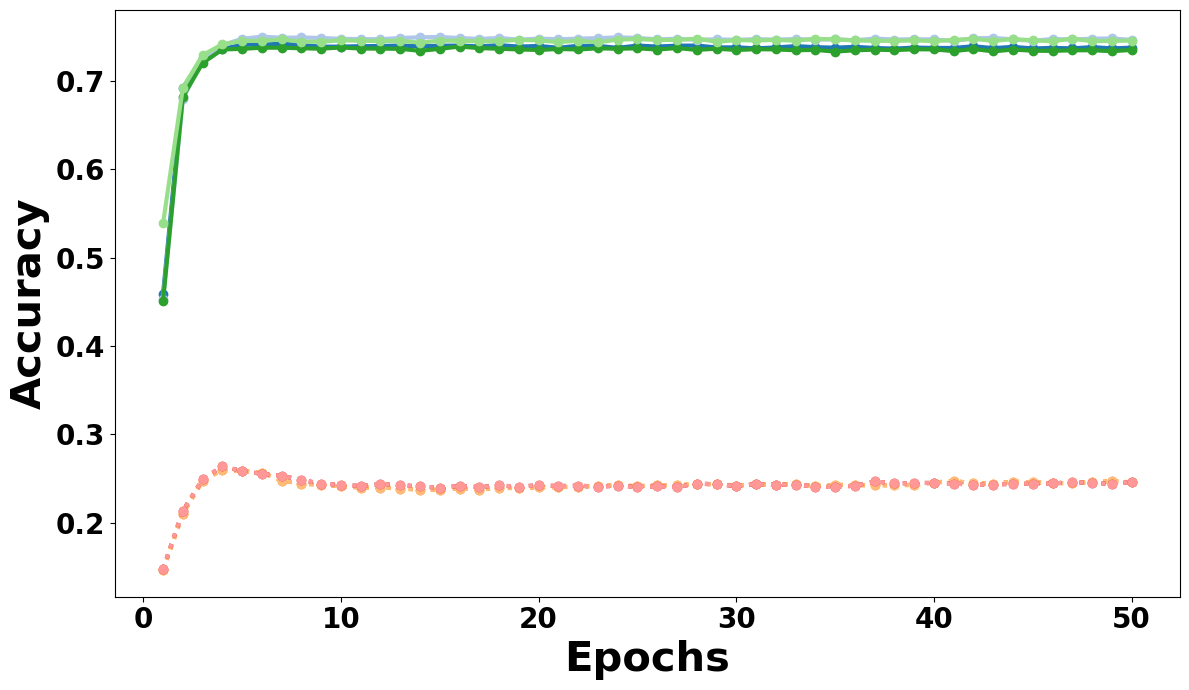

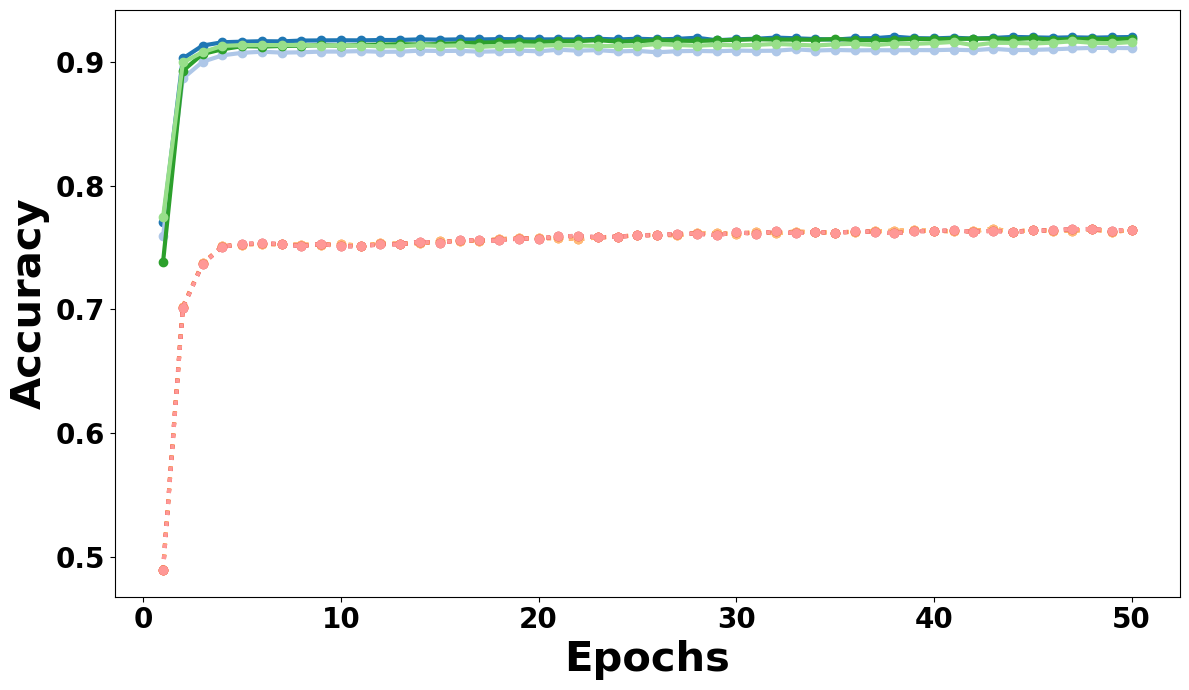

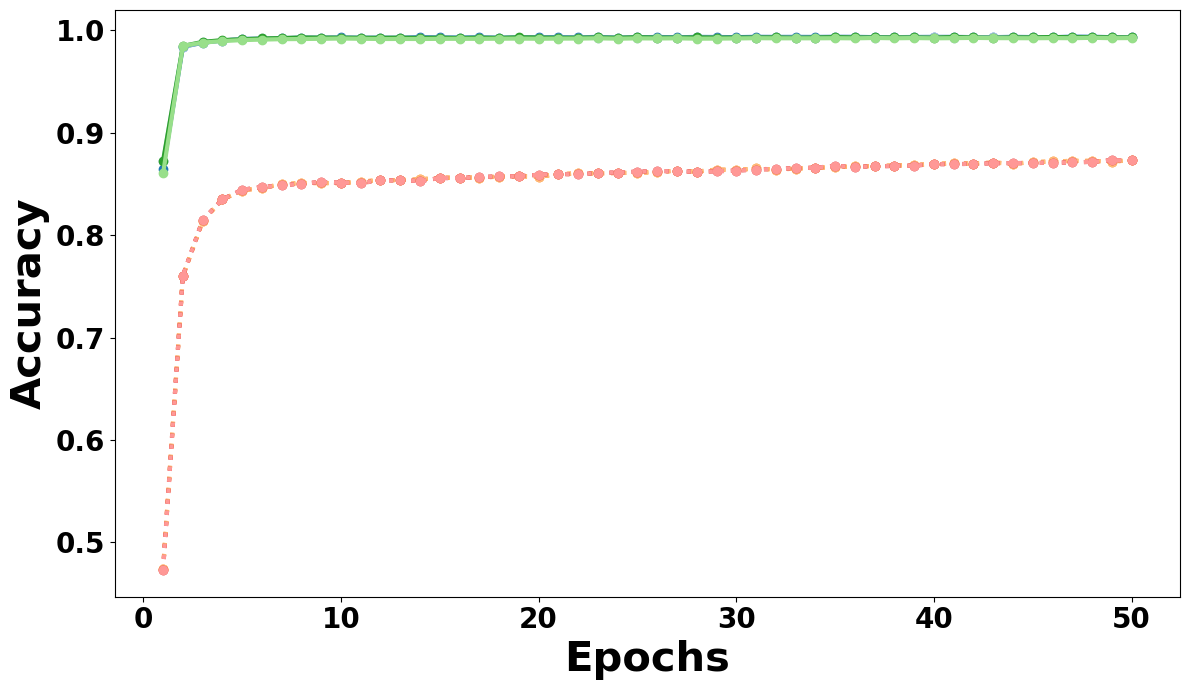

<Figure size 2000x300 with 0 Axes>

In [4]:
# ---------------------------
# 1️⃣ Load Excel file
# ---------------------------
excel_path = "hebbian-sadp_results_summary.xlsx"

poisson_df = pd.read_excel(excel_path, sheet_name="Poisson_Only")
poisson_cnn_df = pd.read_excel(excel_path, sheet_name="CNN+Poisson")

# Add Encoding column
poisson_df['Encoding'] = 'Poisson_Only'
poisson_cnn_df['Encoding'] = 'CNN+Poisson'

# Combine sheets
df = pd.concat([poisson_df, poisson_cnn_df], ignore_index=True)

# ---------------------------
# 2️⃣ Convert Epoch Accuracies to lists
# ---------------------------
def parse_epoch_accuracies(x):
    if isinstance(x, list):
        return x
    elif isinstance(x, np.ndarray):
        return x.tolist()
    elif isinstance(x, str):
        try:
            return eval(x)  # safe if you trust the file
        except:
            return []
    else:
        return []

df['Epoch Accuracies'] = df['Epoch Accuracies'].apply(parse_epoch_accuracies)

# ---------------------------
# 3️⃣ Plotting Setup
# ---------------------------
colors = plt.cm.get_cmap('tab20').colors
datasets = df['Dataset'].unique()
downloads_path = os.path.join(os.path.expanduser("~"), "Downloads")

# Assign consistent color for each (Architecture, Encoding, Timestep)
unique_configs = sorted(set((r['Architecture'], r['Encoding'], r['Timestep']) for _, r in df.iterrows()))
config_colors = {cfg: colors[i % len(colors)] for i, cfg in enumerate(unique_configs)}

# Collect handles & labels for shared legend
legend_handles, legend_labels = [], []

# ---------------------------
# 4️⃣ Plot per dataset with encoding-based line styles
# ---------------------------
colors = plt.cm.Set1.colors  # high-contrast, vivid colors

for dataset in datasets:
    dataset_results = df[df['Dataset'] == dataset]
    plt.figure(figsize=(12, 7))
    
    for _, row in dataset_results.iterrows():
        cfg = (row['Architecture'], row['Encoding'], row['Timestep'])
        color = config_colors[cfg] if cfg in config_colors else colors[0]
        
        # Linestyle based on encoding
        linestyle = ':' if row['Encoding'] == "Poisson_Only" else '-'
        
        label = f"{row['Architecture']} | {row['Encoding']} | T={row['Timestep']}"
        
        # Plot epoch accuracies with thicker line and markers
        line, = plt.plot(
            range(1, len(row['Epoch Accuracies']) + 1),
            row['Epoch Accuracies'],
            color=color,
            linestyle=linestyle,
            linewidth=3,   # thicker line
            marker='o',    # optional: add markers at each epoch
            markersize=6
        )
        
        if label not in legend_labels:
            legend_handles.append(line)
            legend_labels.append(label)
    
    plt.xlabel("Epochs", fontsize=30, fontweight='bold')
    plt.ylabel("Accuracy", fontsize=30, fontweight='bold')
    
    # Ticks bold and readable
    plt.xticks(fontsize=20, fontweight='bold')
    plt.yticks(fontsize=20, fontweight='bold')
    
    plt.grid(False)
    plt.tight_layout()
    
    # Save individual plot
    save_path = os.path.join(downloads_path, f"{dataset}_accuracy_plot.png")
    plt.savefig(save_path, dpi=300)
    plt.show()
    plt.close()

# ---------------------------
# 5️⃣ Shared legend figure with bold text (adjusted)
# ---------------------------
num_columns = 4  # split legend items into multiple columns
fig_legend = plt.figure(figsize=(20, 3))  # wider figure

# Create legend
legend = fig_legend.legend(
    legend_handles,
    legend_labels,
    loc='center',
    ncol=num_columns,
    fontsize=18,
    frameon=False,
    title_fontsize=20,
)

# Make text bold
for text in legend.get_texts():
    text.set_fontweight('bold')
legend.get_title().set_fontweight('bold')

fig_legend.tight_layout(pad=1)  # add padding to keep legend inside

# Save and display
legend_path = os.path.join(downloads_path, "shared_legend.png")
fig_legend.savefig(legend_path, dpi=300, bbox_inches='tight')  # ensure nothing is cut
plt.show()
plt.close()


